# 1. import libraries

In [ ]:
# data manipulation and plotting tools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# data processing
# from category_encoders.one_hot import OneHotEncoder
# from category_encoders.ordinal import OrdinalEncoder
# from category_encoders.target_encoder import TargetEncoder
# from sklearn.preprocessing import MinMaxScaler, RobustScaler

# algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# model selection tools
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

# explainability
import shap

# 2. Load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/churn.csv")

In [ ]:
data

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,...,0,1639.44,3039.53,5,Stayed,No,45,5306,NaN,NaN
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,...,0,865.20,2807.47,3,Stayed,No,59,2140,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,...,0,2135.52,9453.04,4,Stayed,No,71,5560,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,...,0,0.00,319.21,4,Stayed,No,59,2793,NaN,NaN


# 3. Data Splitting

In [ ]:
# train_data, tmp_data = train_test_split(data, test_size=0.3, stratify=data[""] random_state=42)
# val_data, test_data = train_test_split(tmp_data, stratify=data[""], test_size=0.50, random_state=42)

# 4. Exploratory Data Analysis

In [ ]:
# Your code here. Exploratory data analysis can be done before splitting, but do not transform the dataset before splitting.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [ ]:
def analizar_valores_faltantes(data):
    valores_faltantes = data.isnull().sum()
    porcentaje = (valores_faltantes / len(data)) * 100

    datos_faltantes = pd.DataFrame({
        'Valores Faltantes': valores_faltantes,
        'Porcentaje': porcentaje
    })

    return datos_faltantes.sort_values('Porcentaje', ascending=False)

In [ ]:
print("Análisis de Valores Faltantes:")
print(analizar_valores_faltantes(data))

Análisis de Valores Faltantes:
                                   Valores Faltantes  Porcentaje
Churn Reason                                    5174   73.463013
Churn Category                                  5174   73.463013
Offer                                           3877   55.047565
Internet Type                                   1526   21.666903
Senior Citizen                                     0    0.000000
Married                                            0    0.000000
Age                                                0    0.000000
Under 30                                           0    0.000000
Country                                            0    0.000000
State                                              0    0.000000
City                                               0    0.000000
Zip Code                                           0    0.000000
Latitude                                           0    0.000000
Longitude                                          0    0.0

In [ ]:
data.describe()


,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040,4400.295755
std,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031,1183.057152
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000,2003.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000,3469.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000,4527.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000,5380.500000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000,6500.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


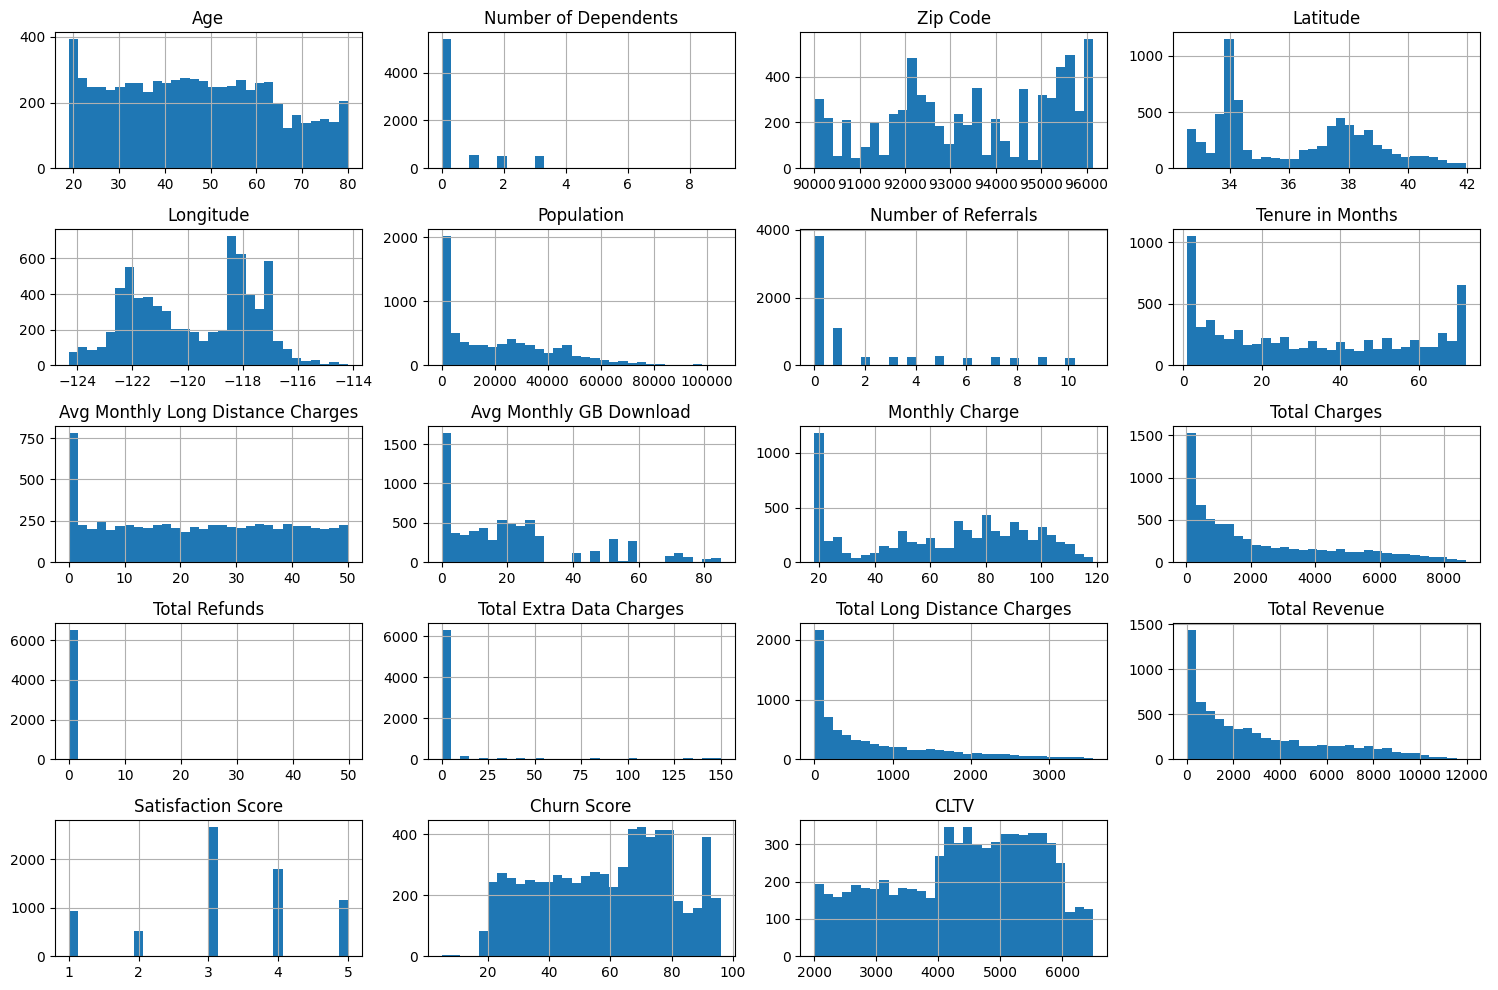

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


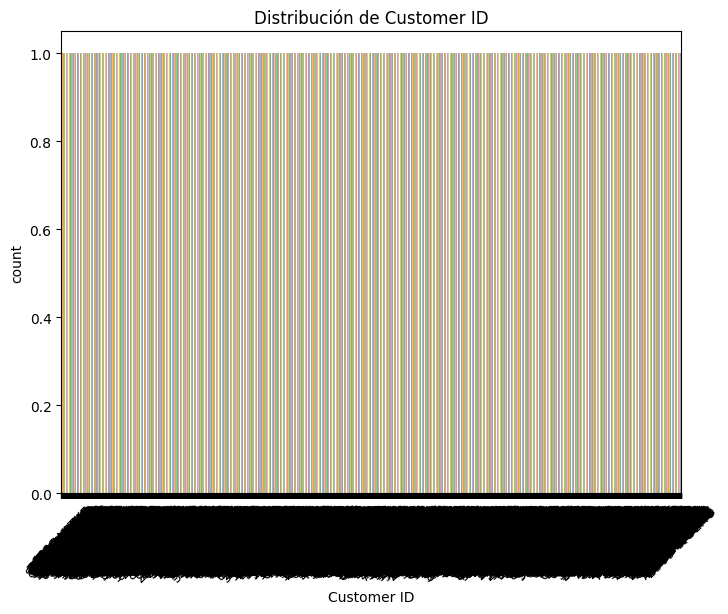

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


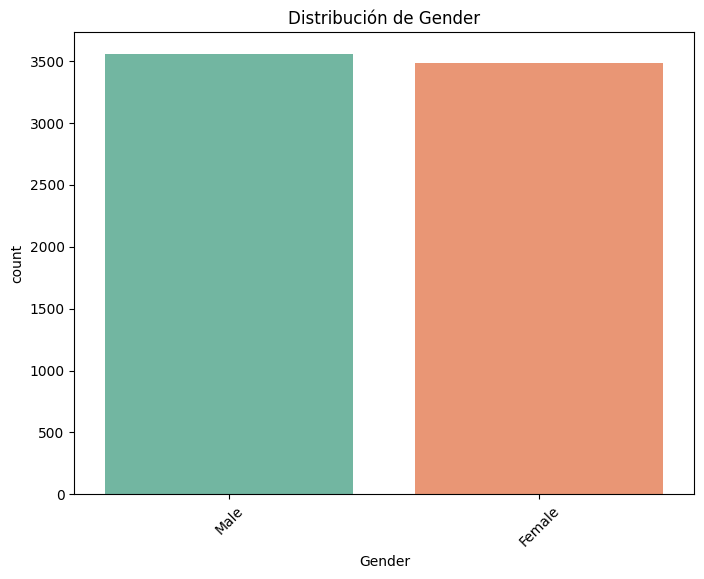

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


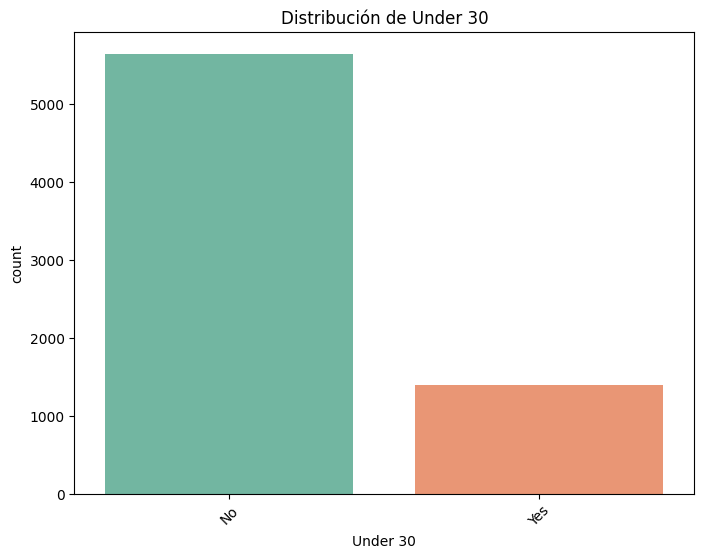

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


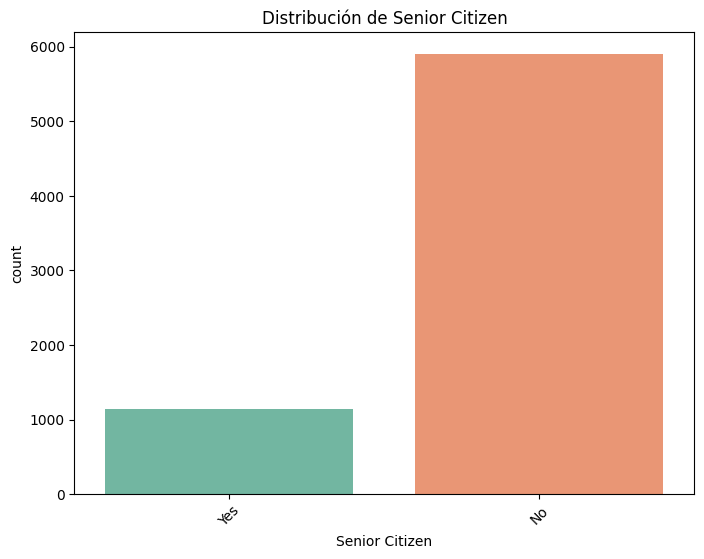

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


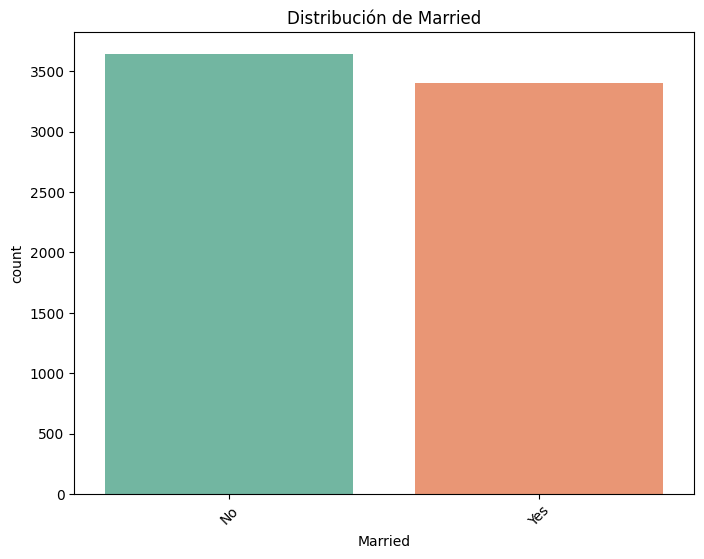

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


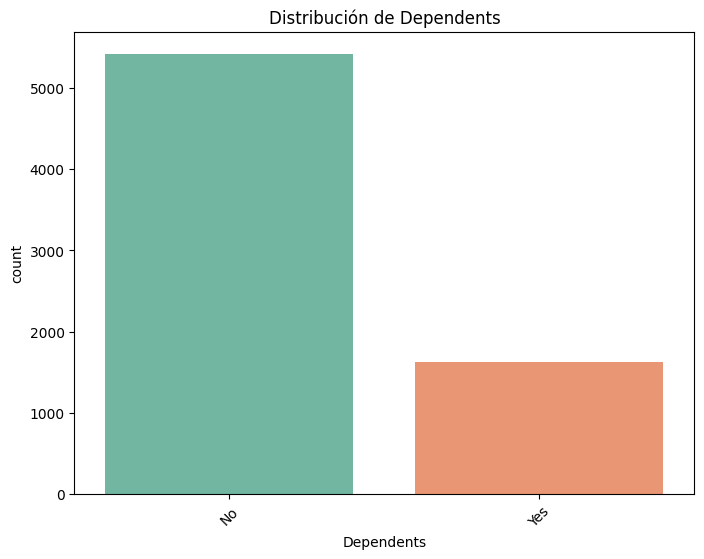

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


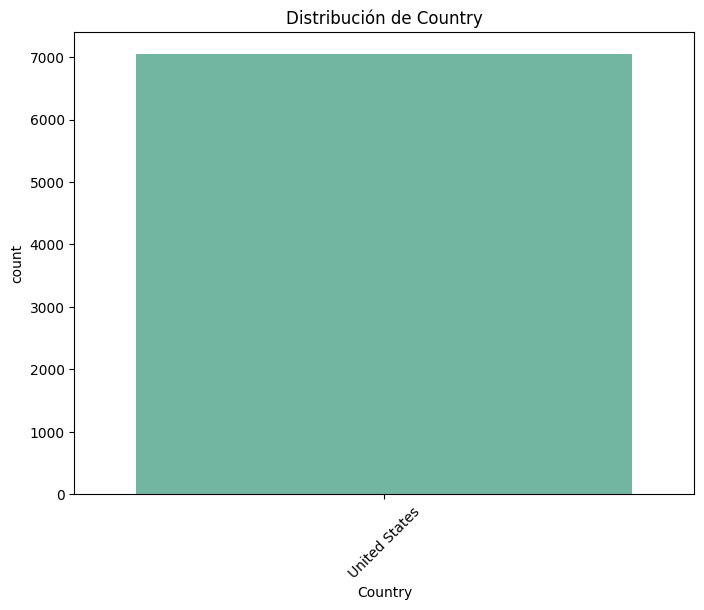

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


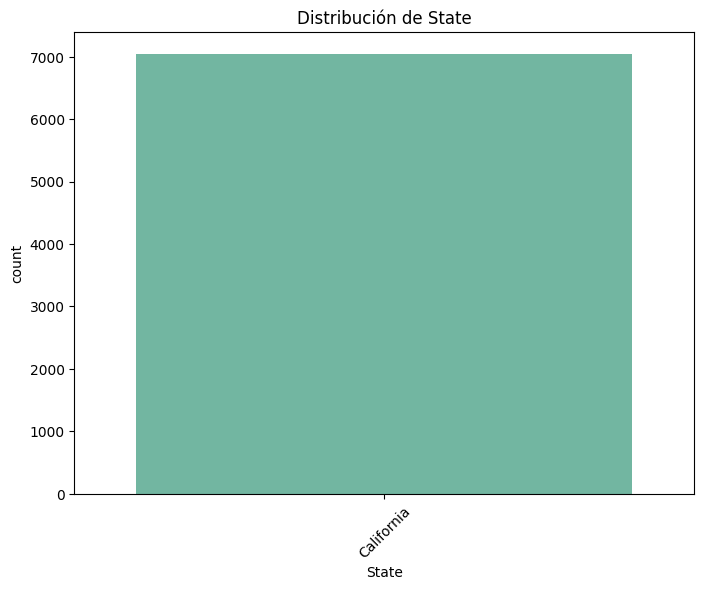

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


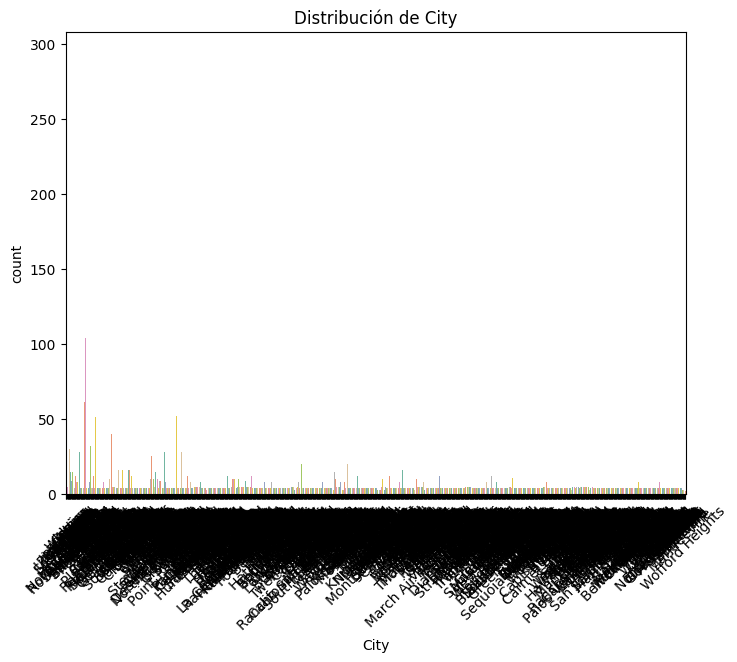

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


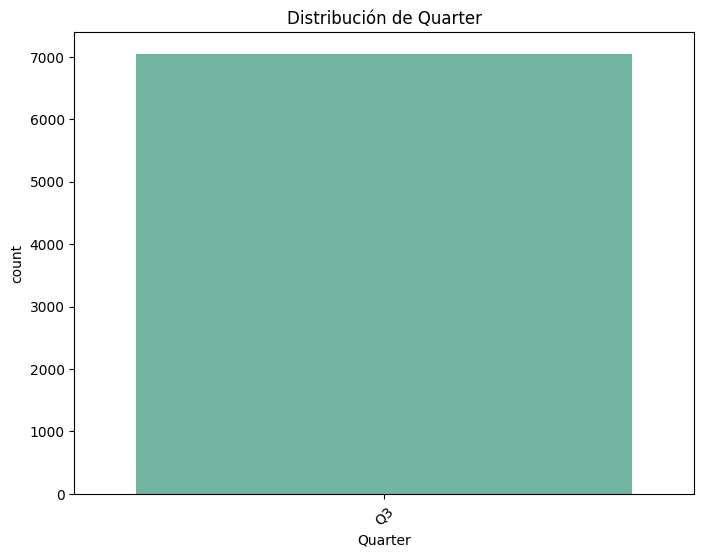

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


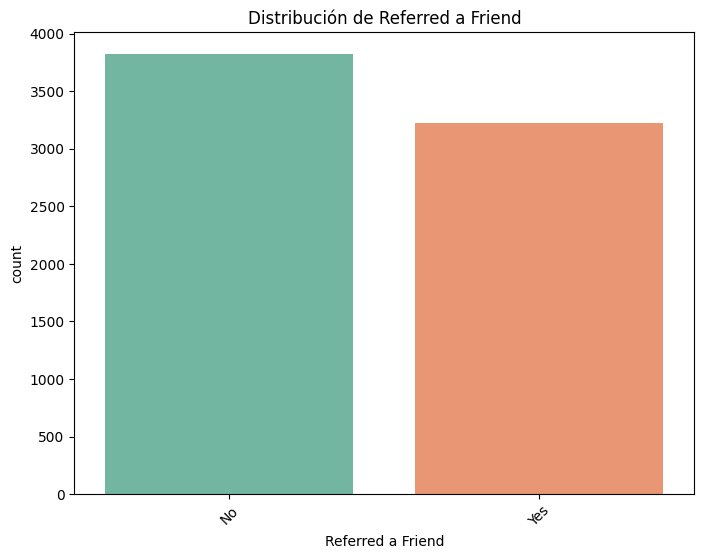

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


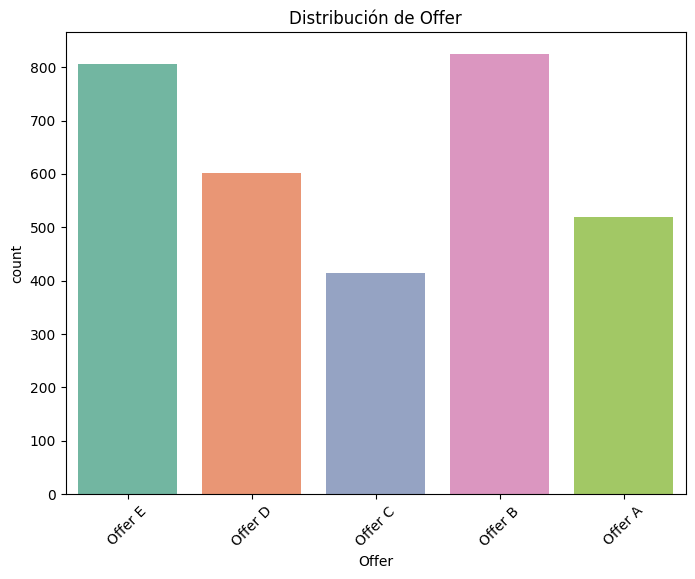

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


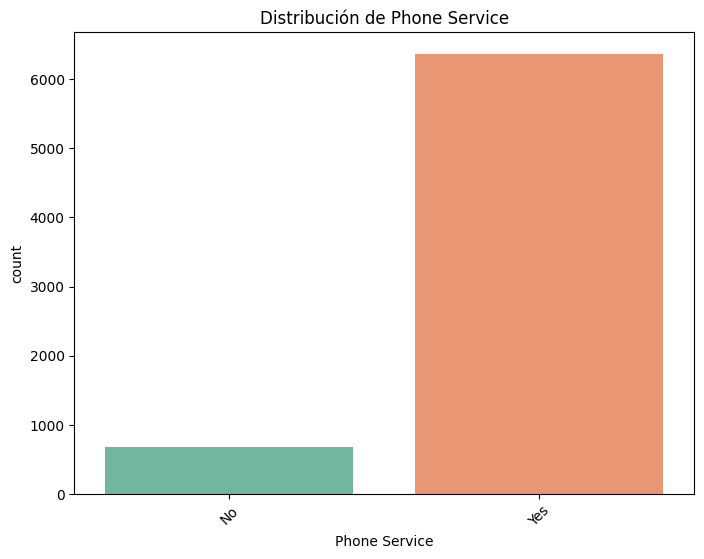

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


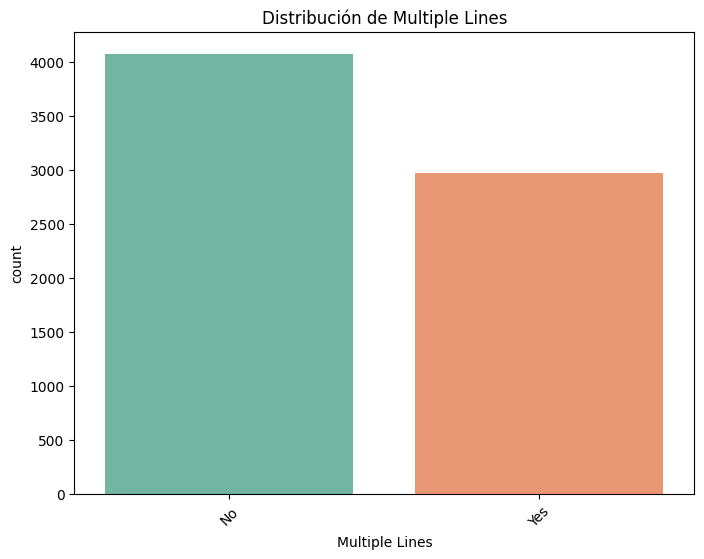

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


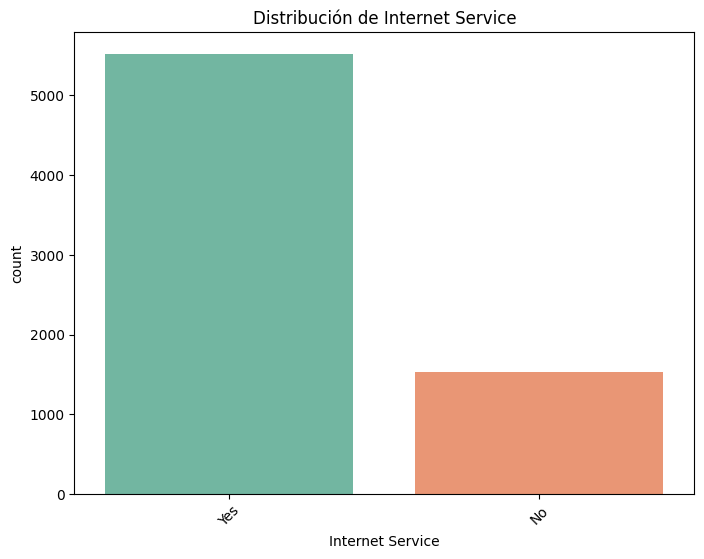

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


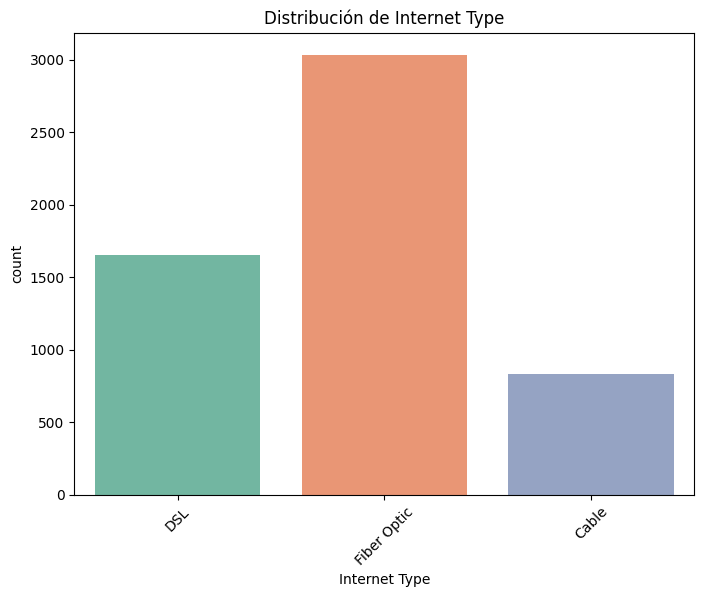

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


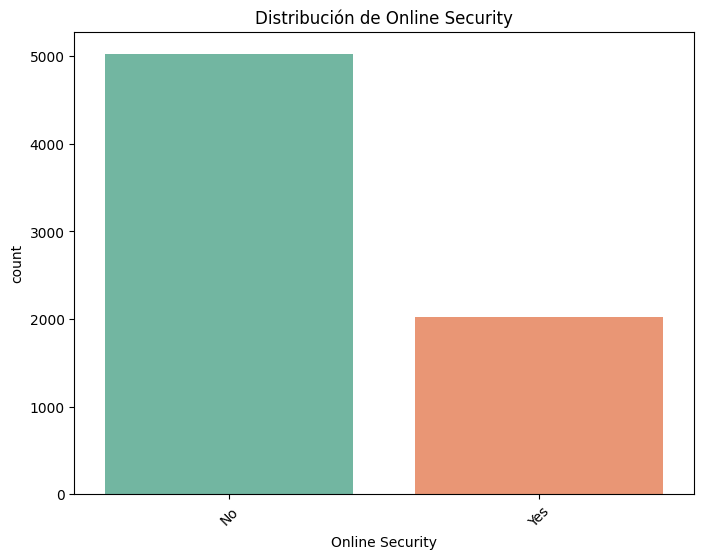

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


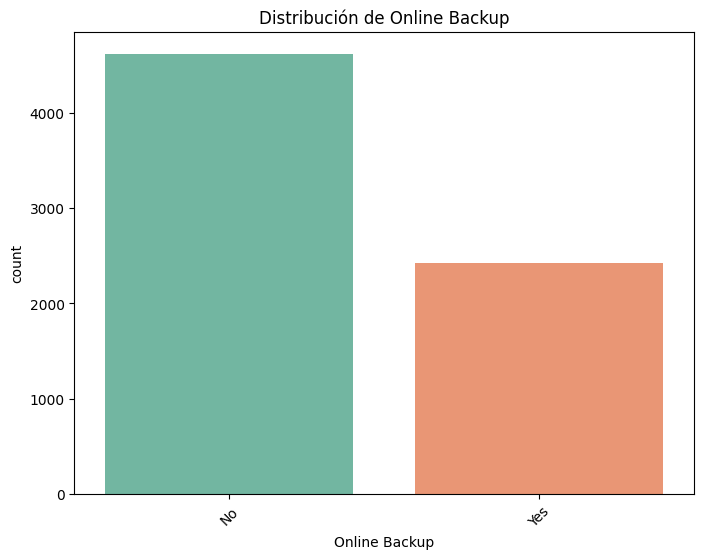

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


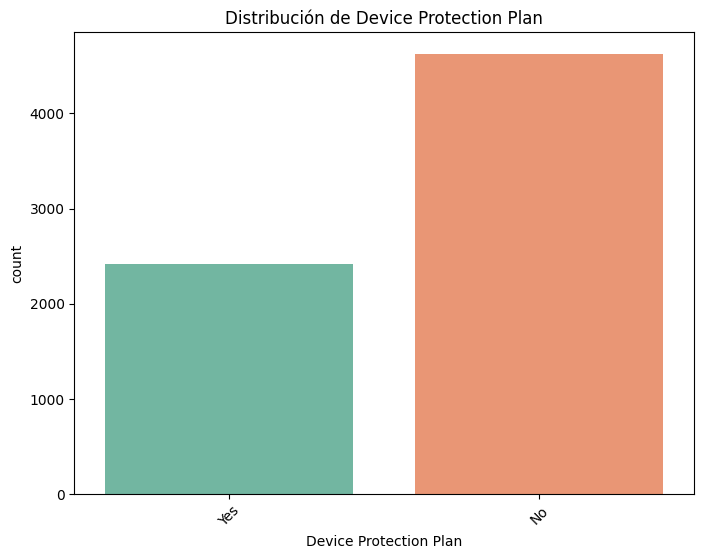

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


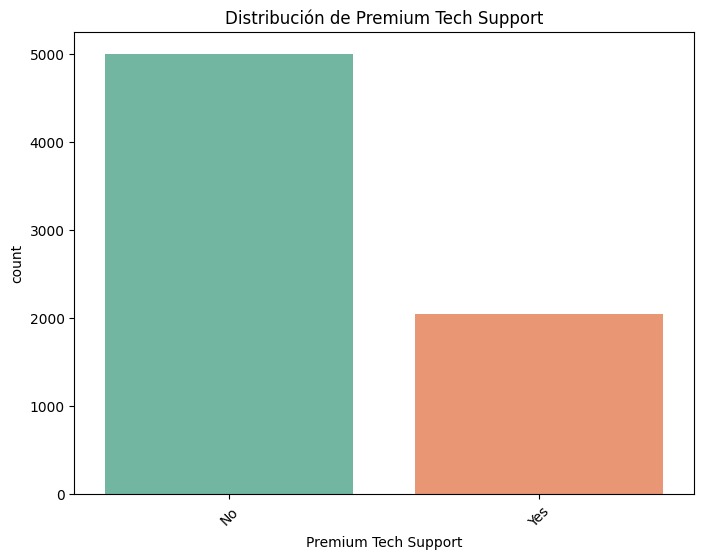

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


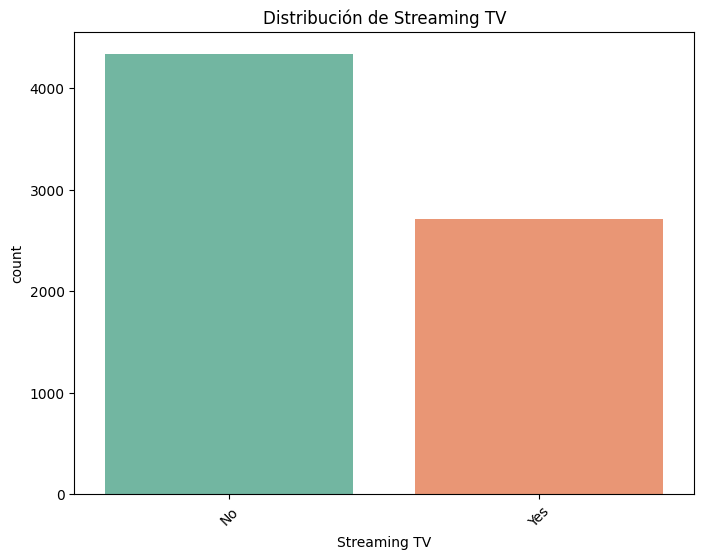

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


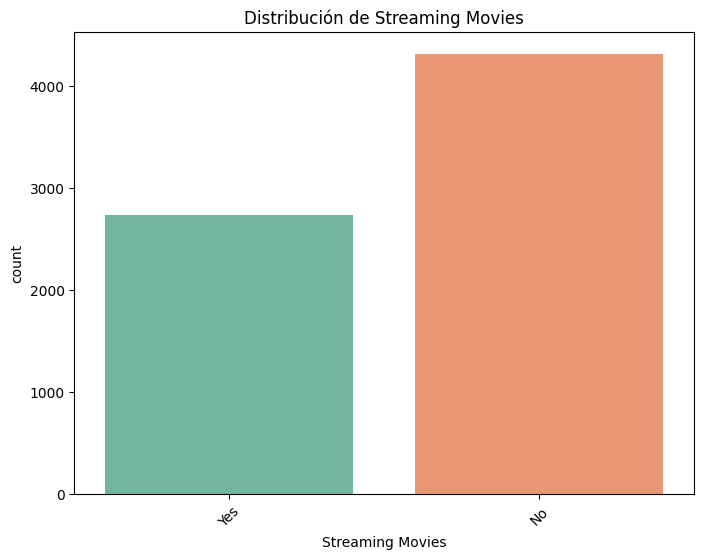

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


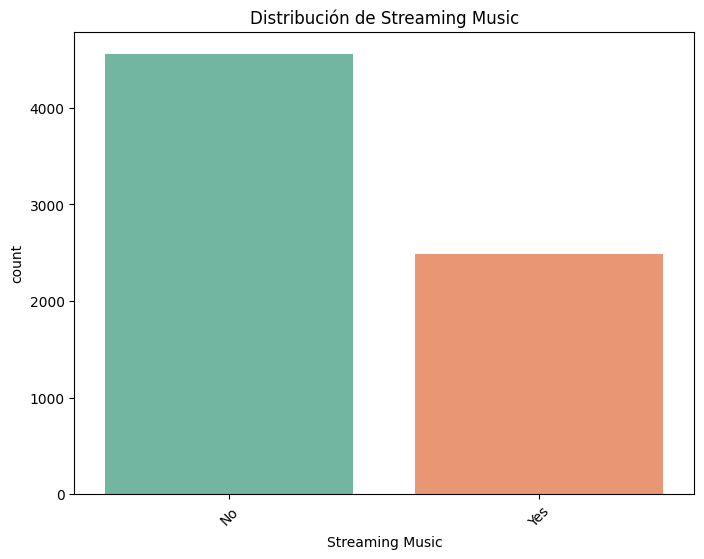

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


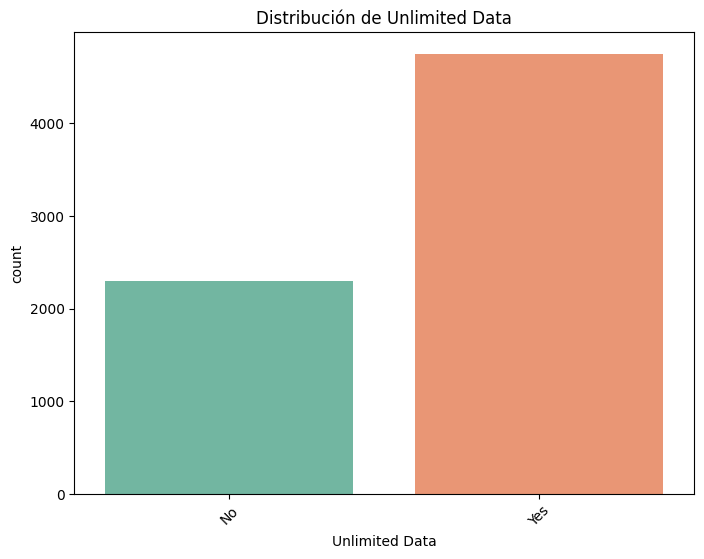

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


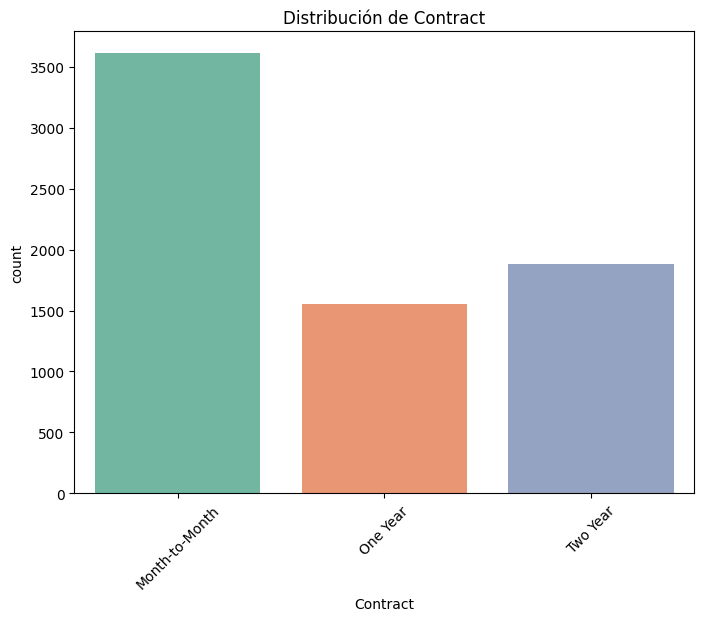

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


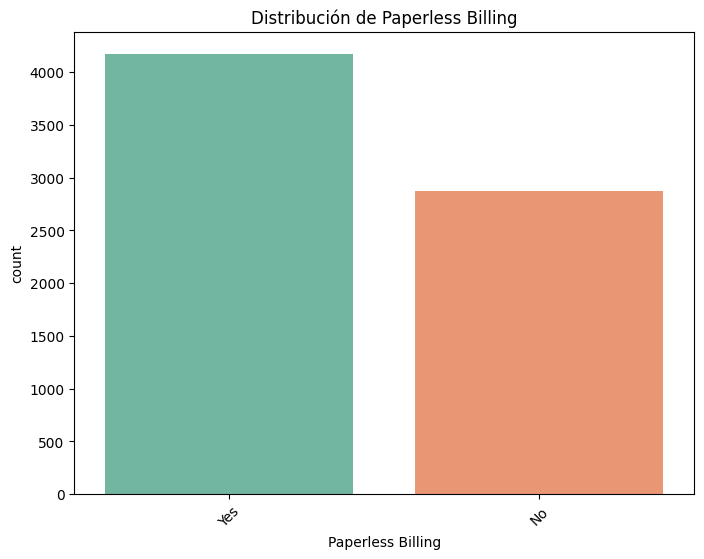

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


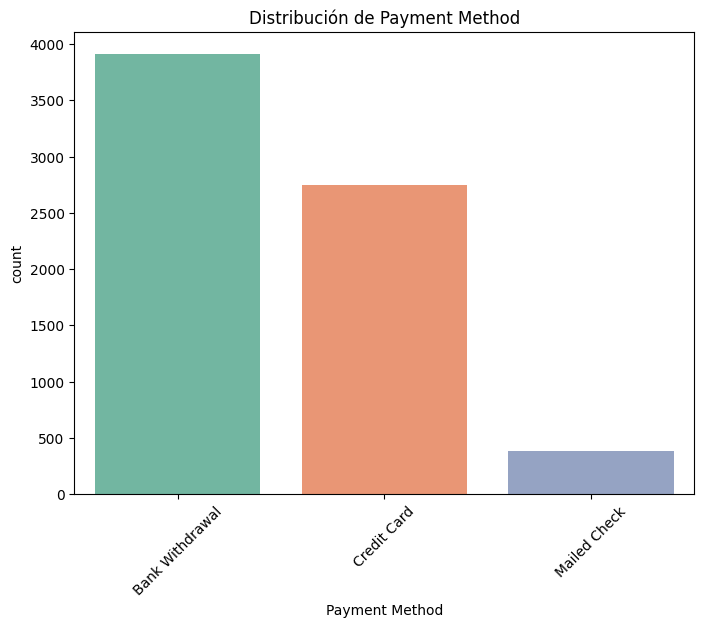

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


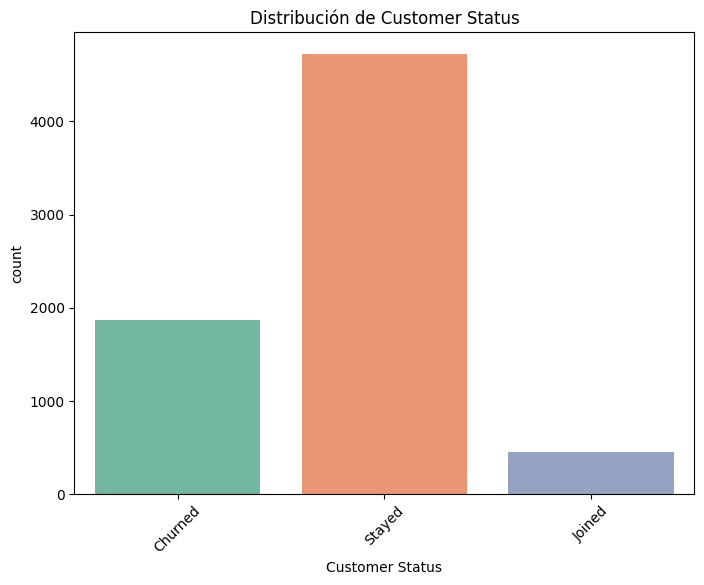

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


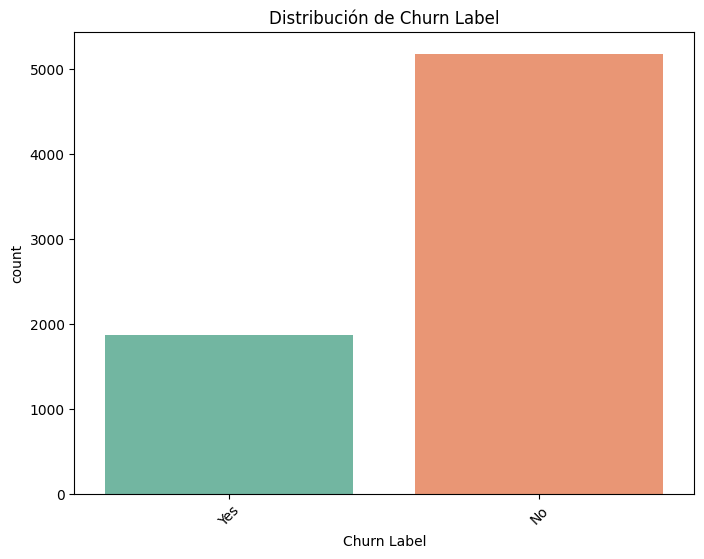

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


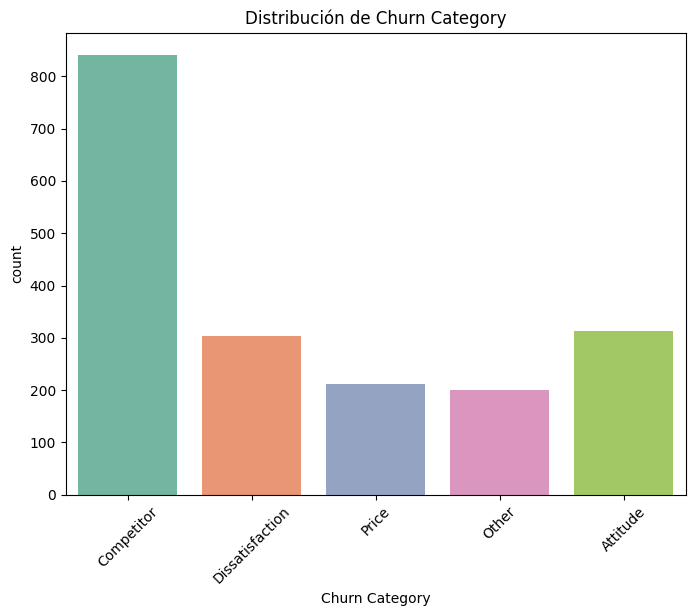

<ipython-input-12-cc839e2cfadc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


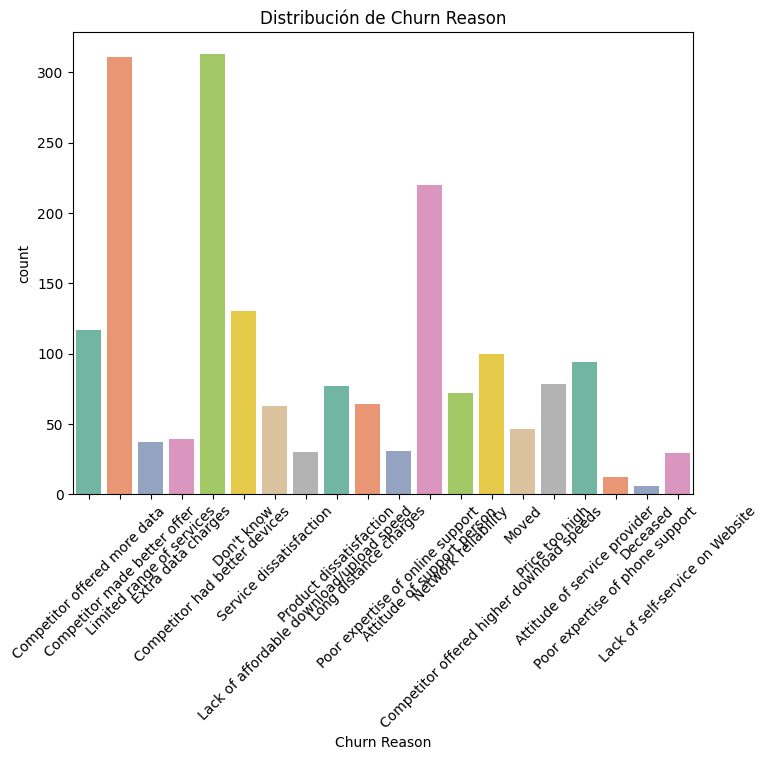

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de las variables numéricas
data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Gráfico de barras para variables categóricas
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=data, palette='Set2')
    plt.title(f'Distribución de {column}')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
#Revisamos la cantidad de valores únicos en el dataframe
for col in data.columns:
    print(f"\n{col}\n")
    print(data[col].value_counts())


Customer ID

Customer ID
3186-AJIEK    1
8779-QRDMV    1
7495-OOKFY    1
4807-IZYOZ    1
1471-GIQKQ    1
             ..
3445-HXXGF    1
0390-DCFDQ    1
4412-YLTKF    1
4846-WHAFZ    1
4598-XLKNJ    1
Name: count, Length: 7043, dtype: int64

Gender

Gender
Male      3555
Female    3488
Name: count, dtype: int64

Age

Age
42    156
47    153
40    150
44    148
23    146
     ... 
80     66
66     63
78     63
67     61
72     58
Name: count, Length: 62, dtype: int64

Under 30

Under 30
No     5642
Yes    1401
Name: count, dtype: int64

Senior Citizen

Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64

Married

Married
No     3641
Yes    3402
Name: count, dtype: int64

Dependents

Dependents
No     5416
Yes    1627
Name: count, dtype: int64

Number of Dependents

Number of Dependents
0    5416
1     553
2     531
3     517
5      10
4       9
6       3
7       2
8       1
9       1
Name: count, dtype: int64

Country

Country
United States    7043
Name: count, dtype: int6

In [ ]:
# Revisión de los valores únicos con porcentajes
for col in data.columns:
    print(f"\n{col}\n")
    print(data[col].value_counts(normalize=True) * 100)  # Multiplicamos por 100 para obtener el porcentaje



Customer ID

Customer ID
3186-AJIEK    0.014198
8779-QRDMV    0.014198
7495-OOKFY    0.014198
4807-IZYOZ    0.014198
1471-GIQKQ    0.014198
                ...   
3445-HXXGF    0.014198
0390-DCFDQ    0.014198
4412-YLTKF    0.014198
4846-WHAFZ    0.014198
4598-XLKNJ    0.014198
Name: proportion, Length: 7043, dtype: float64

Gender

Gender
Male      50.47565
Female    49.52435
Name: proportion, dtype: float64

Age

Age
42    2.214965
47    2.172370
40    2.129774
44    2.101377
23    2.072980
        ...   
80    0.937101
66    0.894505
78    0.894505
67    0.866108
72    0.823513
Name: proportion, Length: 62, dtype: float64

Under 30

Under 30
No     80.107909
Yes    19.892091
Name: proportion, dtype: float64

Senior Citizen

Senior Citizen
No     83.785319
Yes    16.214681
Name: proportion, dtype: float64

Married

Married
No     51.69672
Yes    48.30328
Name: proportion, dtype: float64

Dependents

Dependents
No     76.899049
Yes    23.100951
Name: proportion, dtype: float64

Number

In [ ]:
numerical_columns = ['Age', 'Number of Dependents',
       'Population', 'Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score',
       ]

<Axes: >

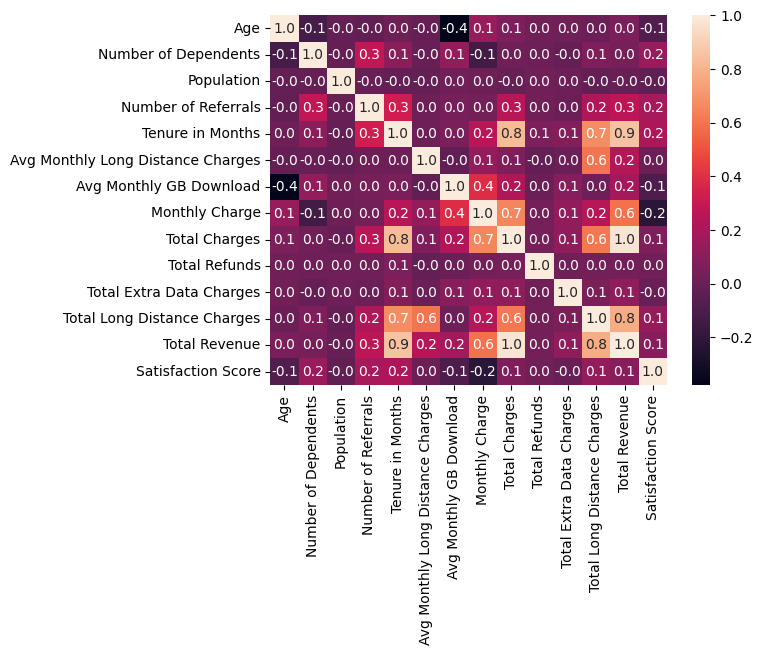

In [ ]:
sns.heatmap(data[numerical_columns].corr(), annot=True, fmt=".1f")

In [ ]:
import pandas as pd

# Primero obtenemos la matriz de correlación
correlation_matrix = data.corr(numeric_only=True)

# Extraemos las correlaciones mayores a 0.7 (sin la diagonal)
correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        var1 = correlation_matrix.columns[i]
        var2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            correlated_pairs.append((var1, var2, corr_value))

# Convertimos a DataFrame para mejor visualización
correlated_df = pd.DataFrame(correlated_pairs, columns=["Variable 1", "Variable 2", "Correlación"])
correlated_df = correlated_df.sort_values(by="Correlación", ascending=False)

# Mostramos los pares correlacionados
print(correlated_df)


                    Variable 1     Variable 2  Correlación
5                Total Charges  Total Revenue     0.972212
0                     Zip Code       Latitude     0.894769
4             Tenure in Months  Total Revenue     0.853146
3             Tenure in Months  Total Charges     0.826074
6  Total Long Distance Charges  Total Revenue     0.778559
1                     Zip Code      Longitude    -0.790564
2                     Latitude      Longitude    -0.885979


In [ ]:
data

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,...,0,1639.44,3039.53,5,Stayed,No,45,5306,NaN,NaN
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,...,0,865.20,2807.47,3,Stayed,No,59,2140,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,...,0,2135.52,9453.04,4,Stayed,No,71,5560,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,...,0,0.00,319.21,4,Stayed,No,59,2793,NaN,NaN


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


<ipython-input-20-54b06ae48034>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


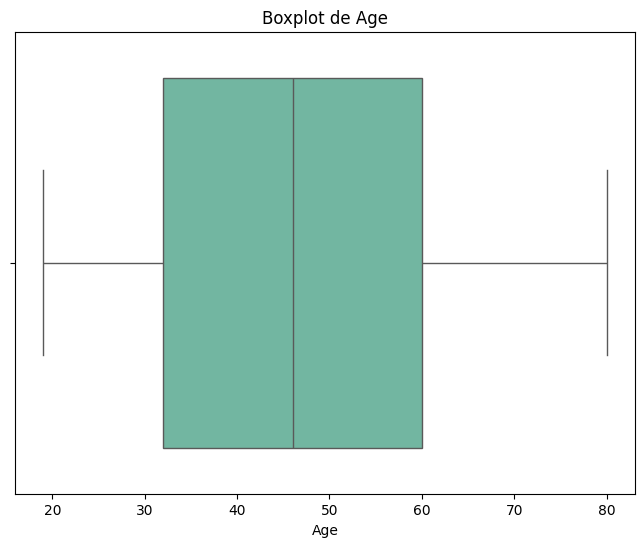

<ipython-input-20-54b06ae48034>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


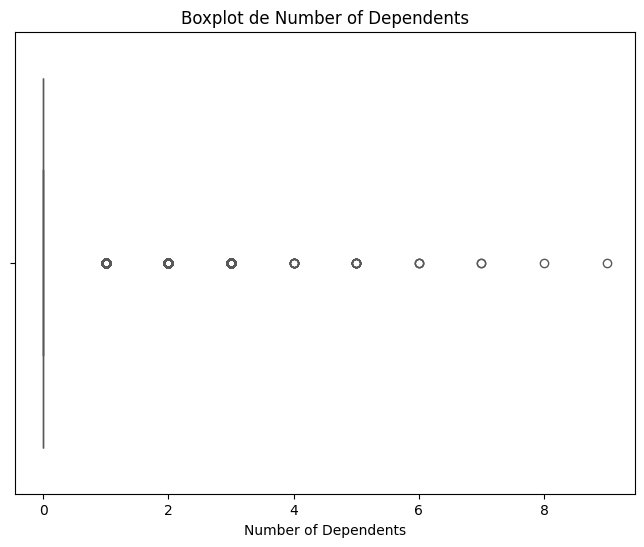

<ipython-input-20-54b06ae48034>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


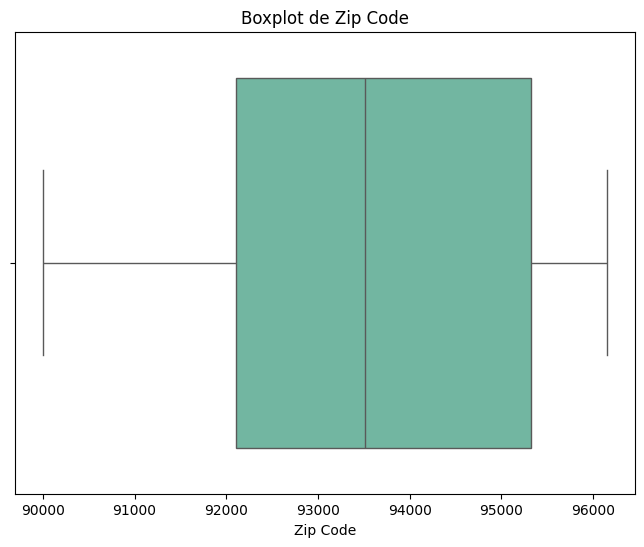

<ipython-input-20-54b06ae48034>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


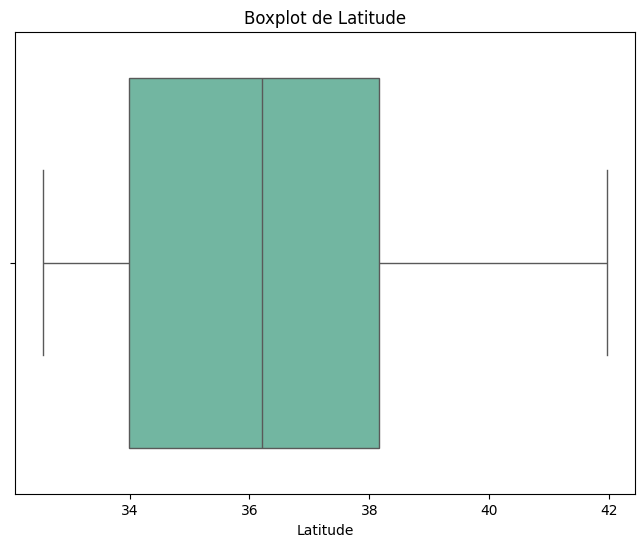

<ipython-input-20-54b06ae48034>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


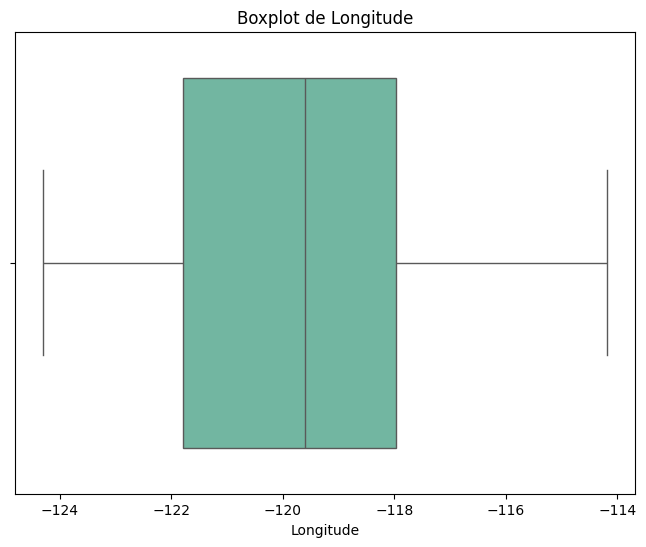

<ipython-input-20-54b06ae48034>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


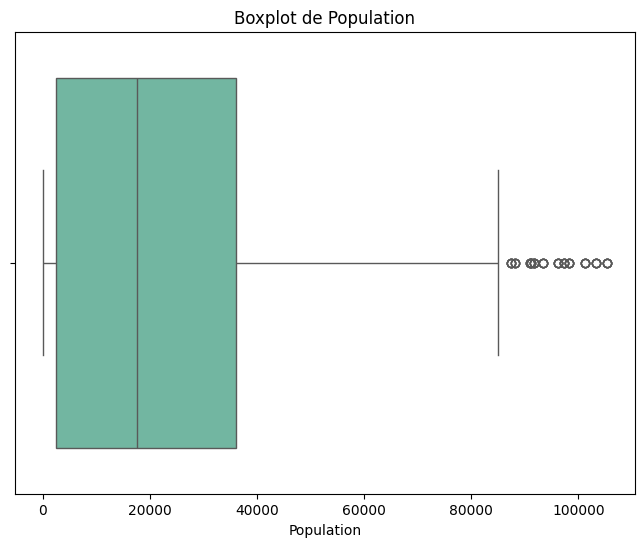

<ipython-input-20-54b06ae48034>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


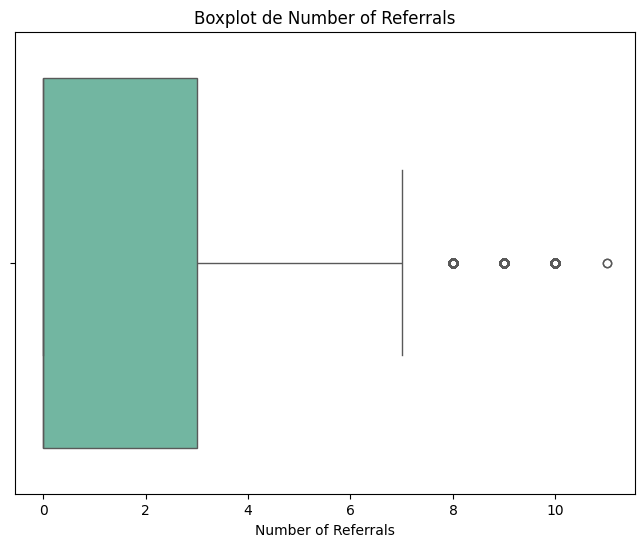

<ipython-input-20-54b06ae48034>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


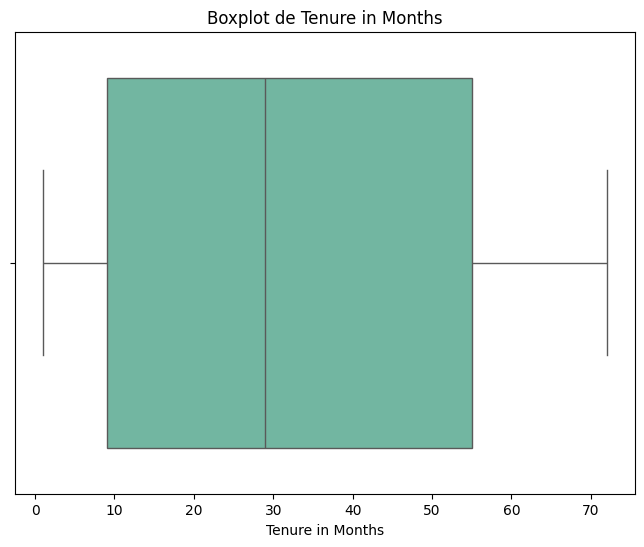

<ipython-input-20-54b06ae48034>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


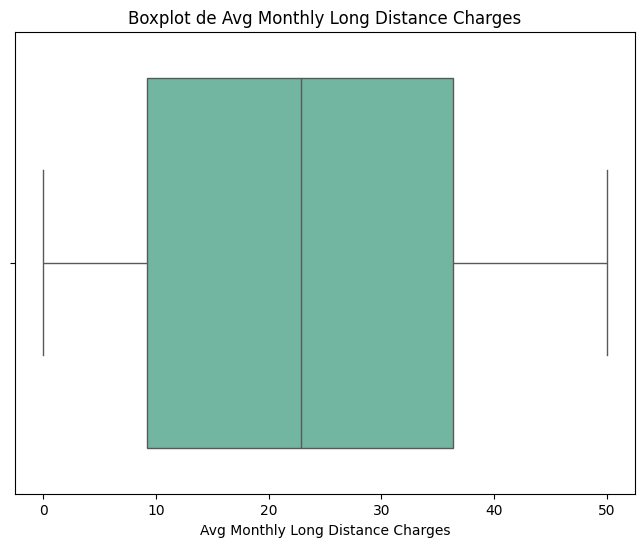

<ipython-input-20-54b06ae48034>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


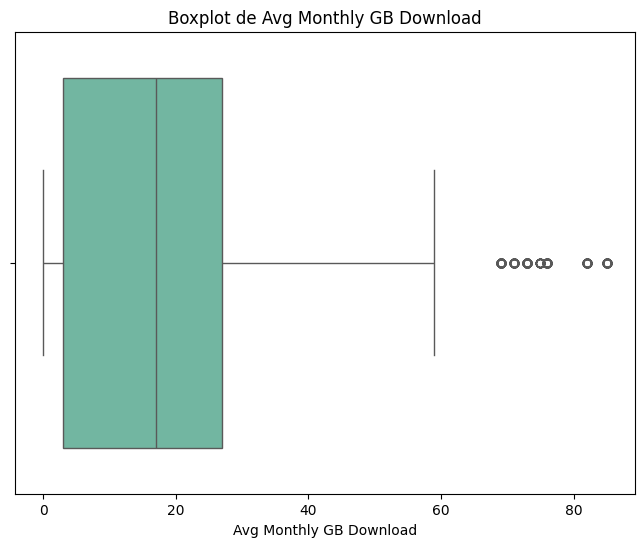

<ipython-input-20-54b06ae48034>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


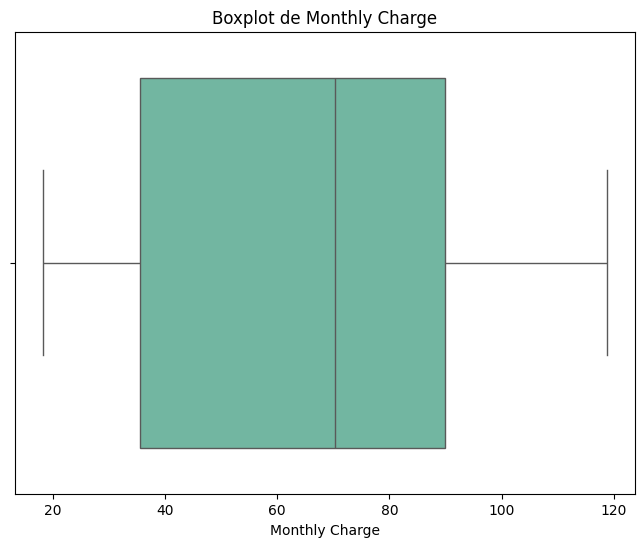

<ipython-input-20-54b06ae48034>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


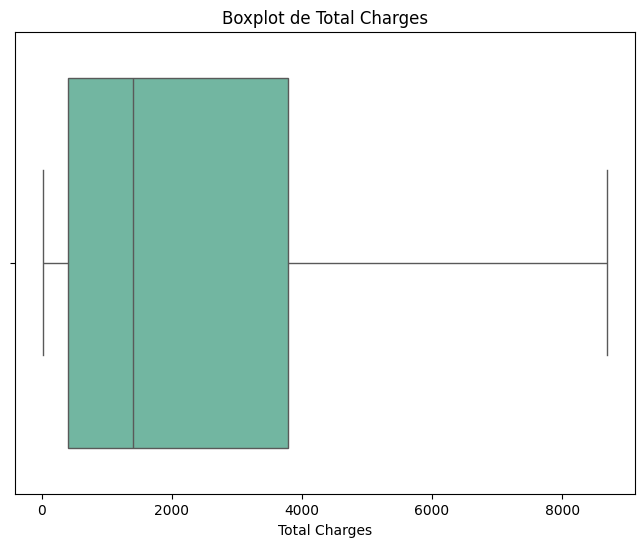

<ipython-input-20-54b06ae48034>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


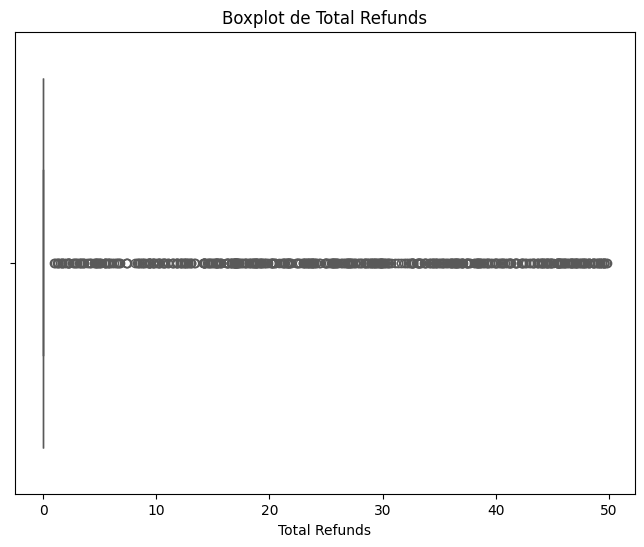

<ipython-input-20-54b06ae48034>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


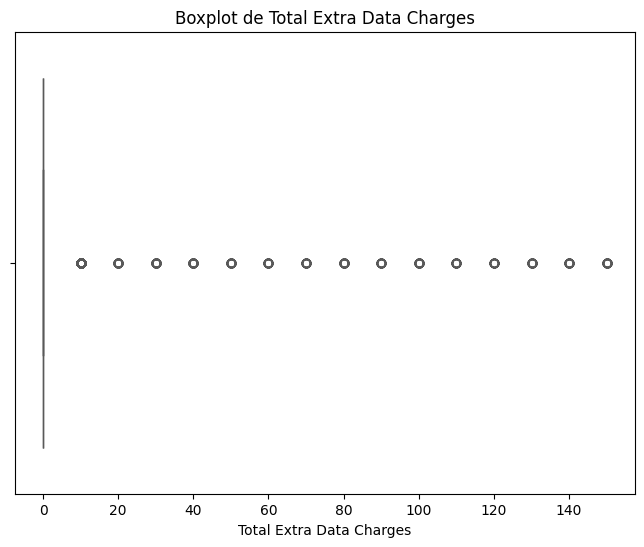

<ipython-input-20-54b06ae48034>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


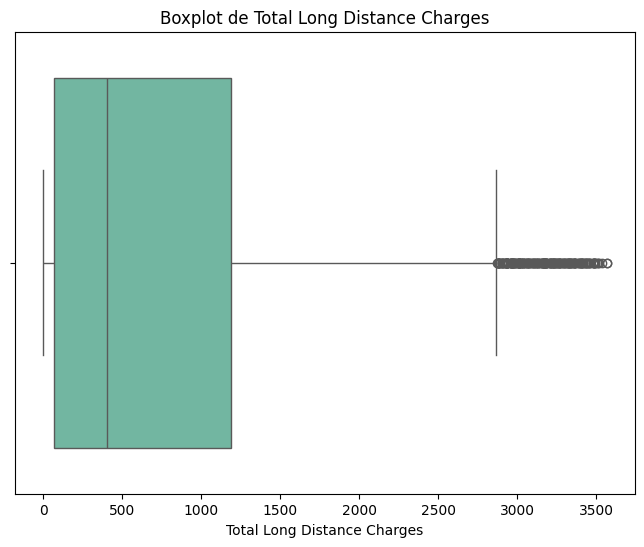

<ipython-input-20-54b06ae48034>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


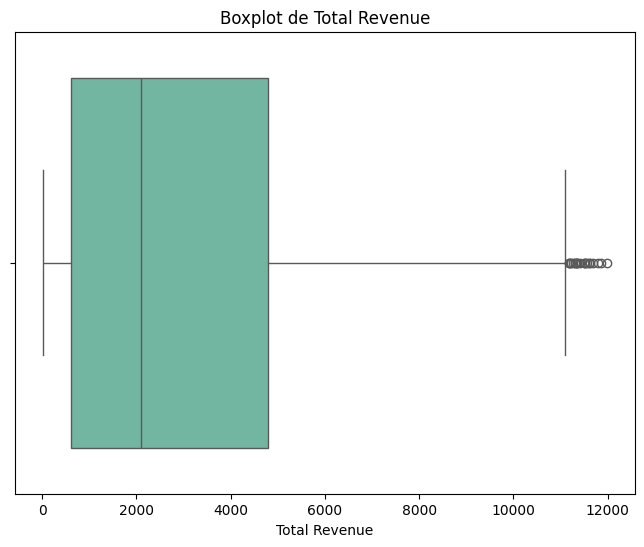

<ipython-input-20-54b06ae48034>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


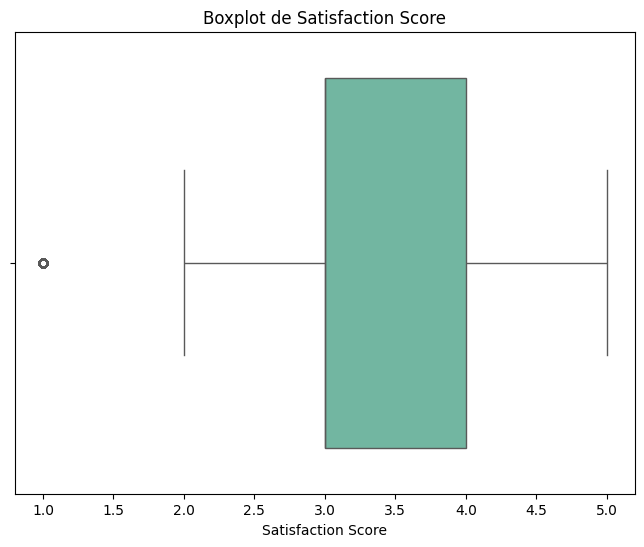

<ipython-input-20-54b06ae48034>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


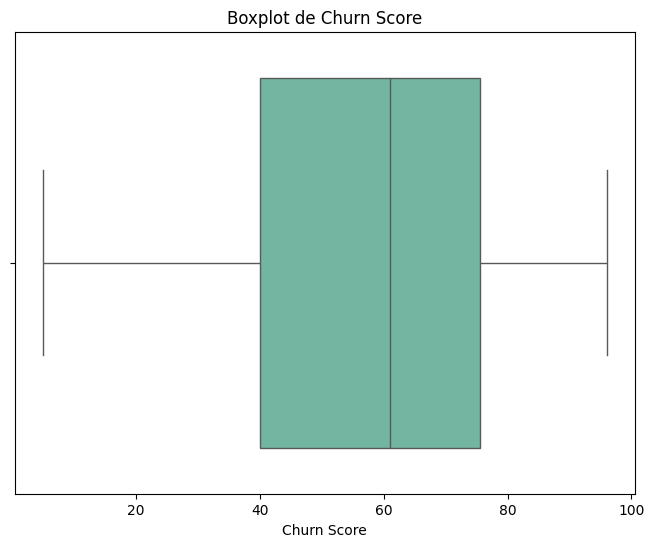

<ipython-input-20-54b06ae48034>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


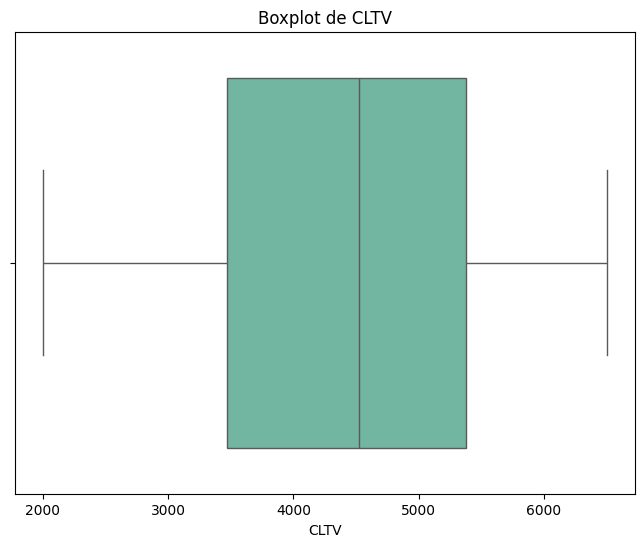

In [ ]:

# Seleccionamos solo las columnas numéricas
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Crear un boxplot para cada variable numérica
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col], palette='Set2')
    plt.title(f'Boxplot de {col}')
    plt.show()


# 5. Data Processing

Eliminamos las variables indicadas por el profesor y variables que no utilizare como longitud, latitud, aquellas que tienen un solo dato (state,city), entre otras que no tienen suficientes datos

In [ ]:
data = data.drop(["Customer ID", "Under 30", "Senior Citizen", "Country", "State", "City", "Latitude", "Longitude", "Quarter", "Churn Category", "Churn Score", "CLTV", "Churn Reason", "Customer Status","Satisfaction Score", "Zip Code"], axis=1)


Observamos que total revenue es igual a total charges+total refunds+ total extra data charges + total long distance charges, por lo que hay una fuerte correlacion entre estas variables, para el primer experimento utilizaremos las variables que conforman total revenue y que no esten fuertemente correlaciones con tenure months y la variable ternure months


In [ ]:
numerical_columns = ['Age', 'Number of Dependents',
       'Population', 'Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'
       ]

<Axes: >

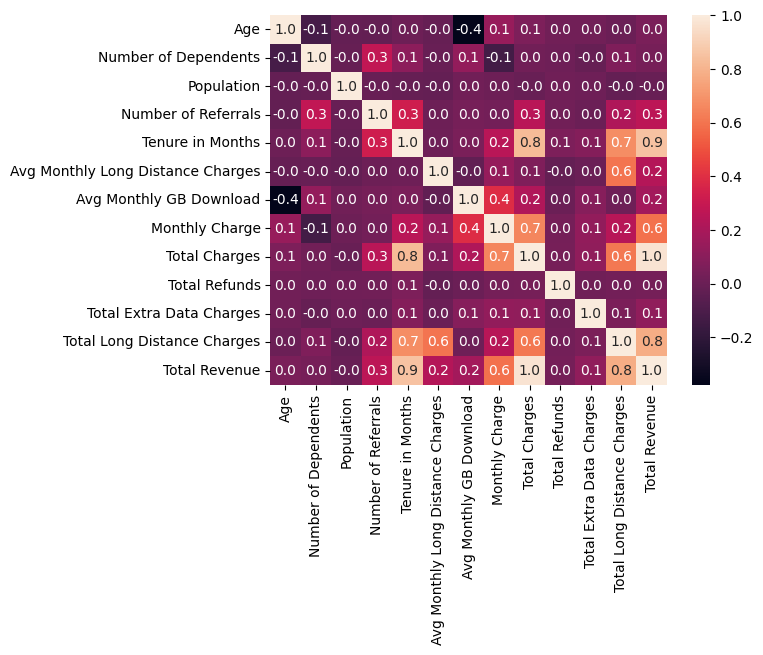

In [ ]:
sns.heatmap(data[numerical_columns].corr(), annot=True, fmt=".1f")

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def detectar_outliers(df, mostrar_graficos=True):
    variables_numericas = df.select_dtypes(include=[np.number])
    resultados = []

    for columna in variables_numericas.columns:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
        cantidad = outliers.shape[0]
        porcentaje = round((cantidad / df.shape[0]) * 100, 2)

        if cantidad > 0:
            resultados.append({
                'Variable': columna,
                'Cantidad Outliers': cantidad,
                'Porcentaje Outliers (%)': porcentaje
            })

            if mostrar_graficos:
                plt.figure(figsize=(8, 2))
                sns.boxplot(x=df[columna])
                plt.title(f'Boxplot de {columna}')
                plt.show()

    return pd.DataFrame(resultados)

# Ejemplo de uso:
# outliers_df = detectar_outliers(data, mostrar_graficos=True)
# display(outliers_df)


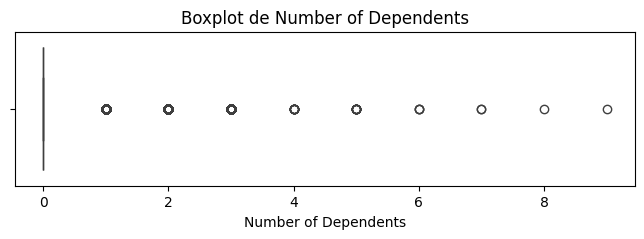

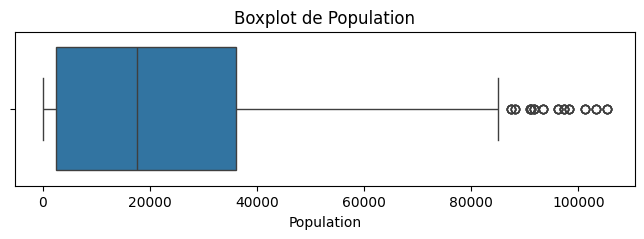

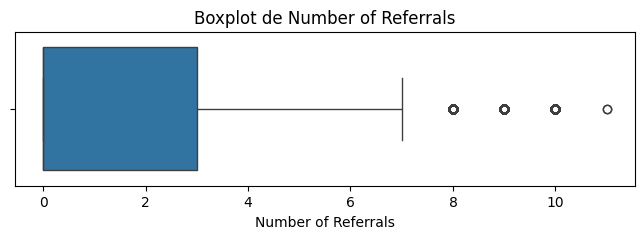

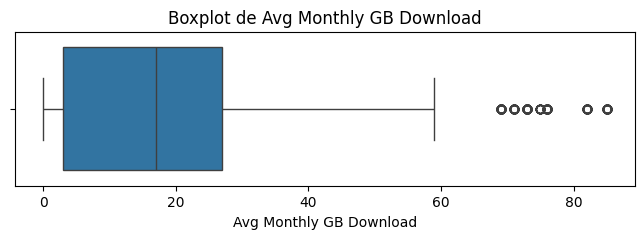

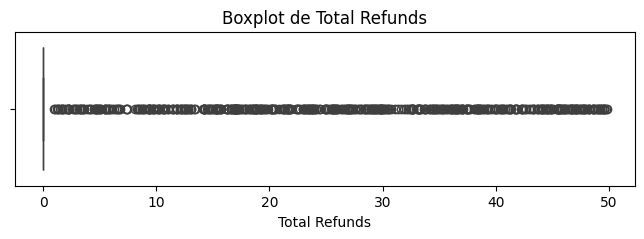

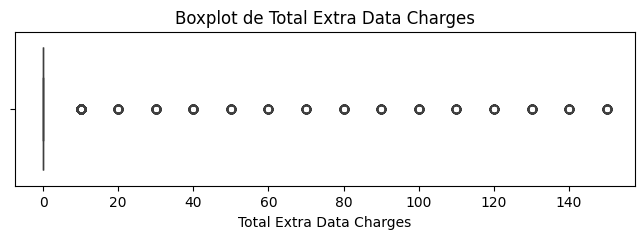

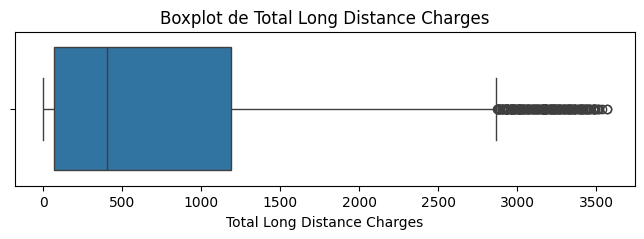

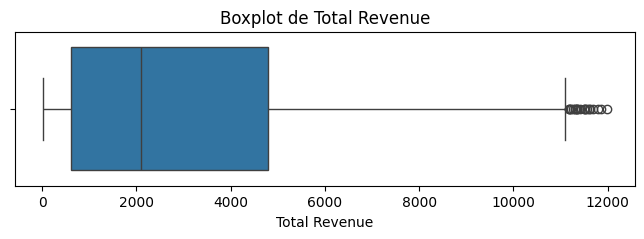

,Variable,Cantidad Outliers,Porcentaje Outliers (%)
0,Number of Dependents,1627,23.10
1,Population,57,0.81
2,Number of Referrals,676,9.60
3,Avg Monthly GB Download,362,5.14
4,Total Refunds,525,7.45
5,Total Extra Data Charges,728,10.34
6,Total Long Distance Charges,196,2.78
7,Total Revenue,21,0.30


In [ ]:
outliers_df = detectar_outliers(data, mostrar_graficos=True)
display(outliers_df)


In [ ]:
def eliminar_outliers(df, columnas):
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]
    return df


Discretizare las variables de numero de dependientes, por lo que solo eliminare outlier de la variable de number referrals

In [ ]:
columnas_numericas = [
    'Total Extra Data Charges']


In [ ]:
data = eliminar_outliers(data, columnas_numericas)


In [ ]:
print("Después:", data.shape)


Después: (6315, 34)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6315 entries, 1 to 7042
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             6315 non-null   object 
 1   Age                                6315 non-null   int64  
 2   Married                            6315 non-null   object 
 3   Dependents                         6315 non-null   object 
 4   Number of Dependents               6315 non-null   int64  
 5   Population                         6315 non-null   int64  
 6   Referred a Friend                  6315 non-null   object 
 7   Number of Referrals                6315 non-null   int64  
 8   Tenure in Months                   6315 non-null   int64  
 9   Offer                              2846 non-null   object 
 10  Phone Service                      6315 non-null   object 
 11  Avg Monthly Long Distance Charges  6315 non-null   float64
 1

## Imputacion

***Offer***:*Identifies the last marketing offer that the customer accepted, if applicable: None, Offer A, Offer B, Offer C, Offer D, and Offer E.*

In [ ]:
data['Offer'] = data['Offer'].fillna("No Offer") #imputado

***Internet Service***:*Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.*

In [ ]:
data[(data["Internet Type"].isnull())&((data["Internet Service"]==0))]

,Gender,Age,Married,Dependents,Number of Dependents,Population,Referred a Friend,Number of Referrals,Tenure in Months,Offer,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Label


In [ ]:
data['Internet Type'] = data['Internet Type'].fillna("No Internet")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6315 entries, 1 to 7042
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             6315 non-null   object 
 1   Age                                6315 non-null   int64  
 2   Married                            6315 non-null   object 
 3   Dependents                         6315 non-null   object 
 4   Number of Dependents               6315 non-null   int64  
 5   Population                         6315 non-null   int64  
 6   Referred a Friend                  6315 non-null   object 
 7   Number of Referrals                6315 non-null   int64  
 8   Tenure in Months                   6315 non-null   int64  
 9   Offer                              6315 non-null   object 
 10  Phone Service                      6315 non-null   object 
 11  Avg Monthly Long Distance Charges  6315 non-null   float64
 1

In [ ]:
data["Churn Label"].value_counts()

,count
Churn Label,
No,4685
Yes,1630


In [ ]:
list(data.columns)


['Gender',
 'Age',
 'Married',
 'Dependents',
 'Number of Dependents',
 'Population',
 'Referred a Friend',
 'Number of Referrals',
 'Tenure in Months',
 'Offer',
 'Phone Service',
 'Avg Monthly Long Distance Charges',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Avg Monthly GB Download',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Monthly Charge',
 'Total Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue',
 'Churn Label']

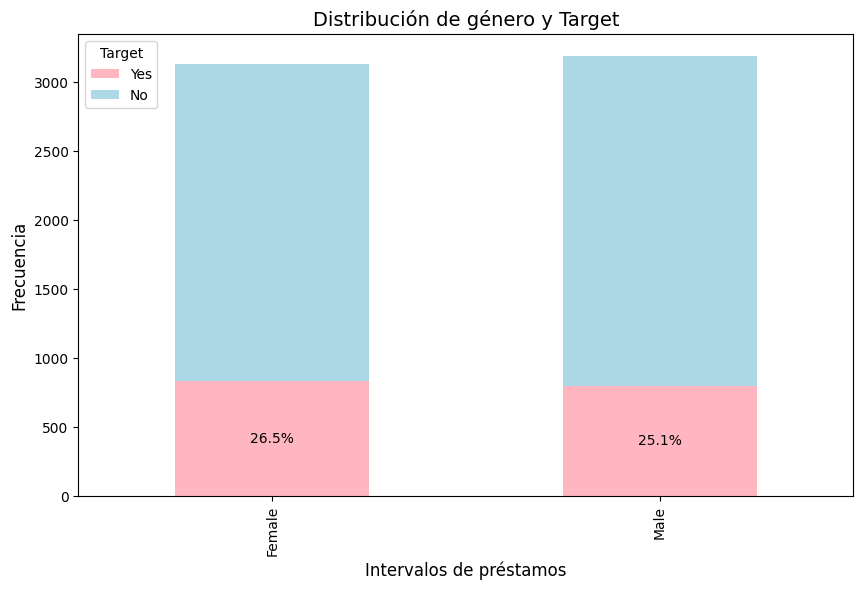

In [ ]:
# Agrupar los datos por categoría e intervalo
grouped_data = data.groupby(['Gender', 'Churn Label']).size().unstack(fill_value=0)

# Calcular porcentajes de "bad"
grouped_data['Yes_porcentaje'] = grouped_data['Yes'] / grouped_data.sum(axis=1) * 100

# Colores pastel
colors = ['lightpink', 'lightblue']

# Crear gráfico de barras apiladas
fig, ax1 = plt.subplots(figsize=(10, 6))
grouped_data[['Yes', 'No']].plot(kind='bar', stacked=True, color=colors, ax=ax1)


for i, (index, row) in enumerate(grouped_data.iterrows()):
    total = row['Yes'] + row['No']
    porcentaje_yes = row['Yes'] / total * 100
    height_yes = row['Yes']
    ax1.text(i, height_yes / 2, f'{porcentaje_yes:.1f}%', ha='center', va='center', fontsize=10, color='black')

# Configurar ejes del gráfico de barras
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.set_xlabel('Intervalos de préstamos', fontsize=12)
ax1.set_title('Distribución de género y Target', fontsize=14)
ax1.legend(['Yes', 'No'], title='Target', loc='upper left')


## Feature Engineering

In [ ]:
data["Number of Dependents"].value_counts()

,count
Number of Dependents,
0,4826
1,504
2,493
3,469
5,9
4,7
6,3
7,2
8,1


In [ ]:
def dependientes(x):
    if x["Number of Dependents"]==0:
        return "Grupo sin dependientes"
    elif x["Number of Dependents"]==1 or x["Number of Dependents"]== 2:
        return "Grupo 1 0 2 dependientes"
    elif x["Number of Dependents"]==3 or x["Number of Dependents"]== 4:
        return "Grupo 3 o 4 dependientes"
    elif x["Number of Dependents"] >4:
        return "Más de 4 dependientes"

In [ ]:
data["Dependientes"]=data.apply(lambda x: dependientes(x),axis=1)

In [ ]:
data["Dependientes"].value_counts()

,count
Dependientes,
Grupo sin dependientes,4826
Grupo 1 0 2 dependientes,997
Grupo 3 o 4 dependientes,476
Más de 4 dependientes,16


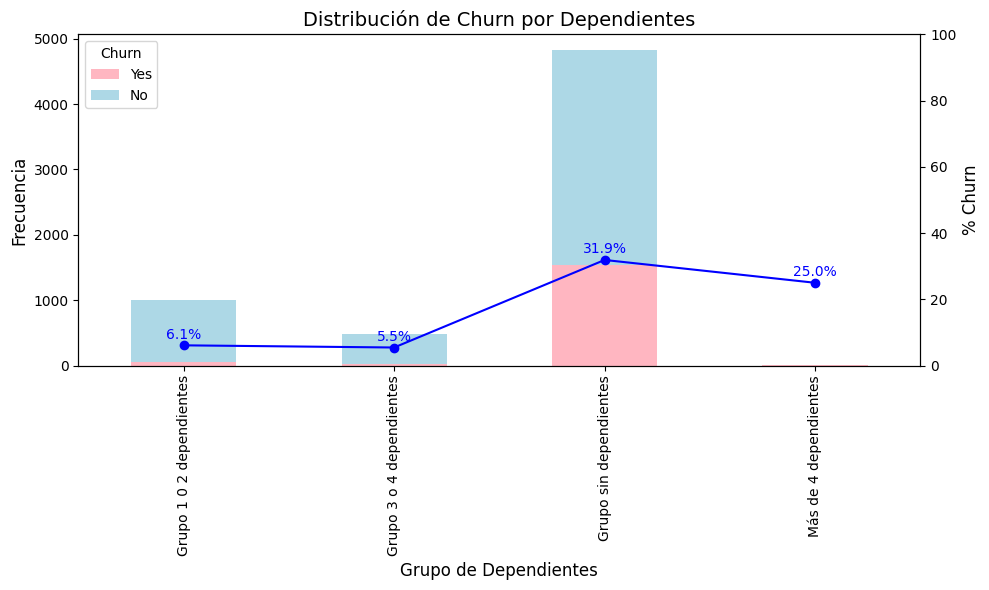

In [ ]:
import matplotlib.pyplot as plt

# Agrupar los datos por Dependientes y Churn Label
grouped_data = data.groupby(['Dependientes', 'Churn Label']).size().unstack(fill_value=0)

# Calcular porcentajes de churn ("Yes")
grouped_data['Yes_percentage'] = grouped_data['Yes'] / grouped_data.sum(axis=1) * 100

# Colores pastel
colors = ['lightpink', 'lightblue']

# Crear gráfico de barras apiladas
fig, ax1 = plt.subplots(figsize=(10, 6))
grouped_data[['Yes', 'No']].plot(kind='bar', stacked=True, color=colors, ax=ax1)

# Configurar ejes del gráfico de barras
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.set_xlabel('Grupo de Dependientes', fontsize=12)
ax1.set_title('Distribución de Churn por Dependientes', fontsize=14)
ax1.legend(['Yes', 'No'], title='Churn', loc='upper left')

# Crear un segundo eje Y para la línea de porcentaje
ax2 = ax1.twinx()
ax2.plot(grouped_data.index, grouped_data['Yes_percentage'], color='blue', marker='o', label='% Yes')
ax2.set_ylabel('% Churn', fontsize=12)
ax2.set_ylim(0, 100)

# Añadir etiquetas del porcentaje en la línea
for i, txt in enumerate(grouped_data['Yes_percentage']):
    ax2.text(i, txt + 2, f'{txt:.1f}%', ha='center', color='blue', fontsize=10)

# Ajustar visualización
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
data["Intervalos_edad"] = pd.qcut(data['Age'], q=4)
data["Intervalos_edad"].value_counts()

,count
Intervalos_edad,
"(32.0, 46.0]",1669
"(18.999, 32.0]",1593
"(59.0, 80.0]",1567
"(46.0, 59.0]",1486


In [ ]:
data["Intervalos_edad"] = data["Intervalos_edad"].astype(str)


In [ ]:
pd.crosstab(data["Intervalos_edad"], data['Churn Label'], normalize='index')*100

Churn Label,No,Yes
Intervalos_edad,,
"(18.999, 32.0]",78.217200,21.782800
"(32.0, 46.0]",77.052127,22.947873
"(46.0, 59.0]",76.110363,23.889637
"(59.0, 80.0]",65.220166,34.779834


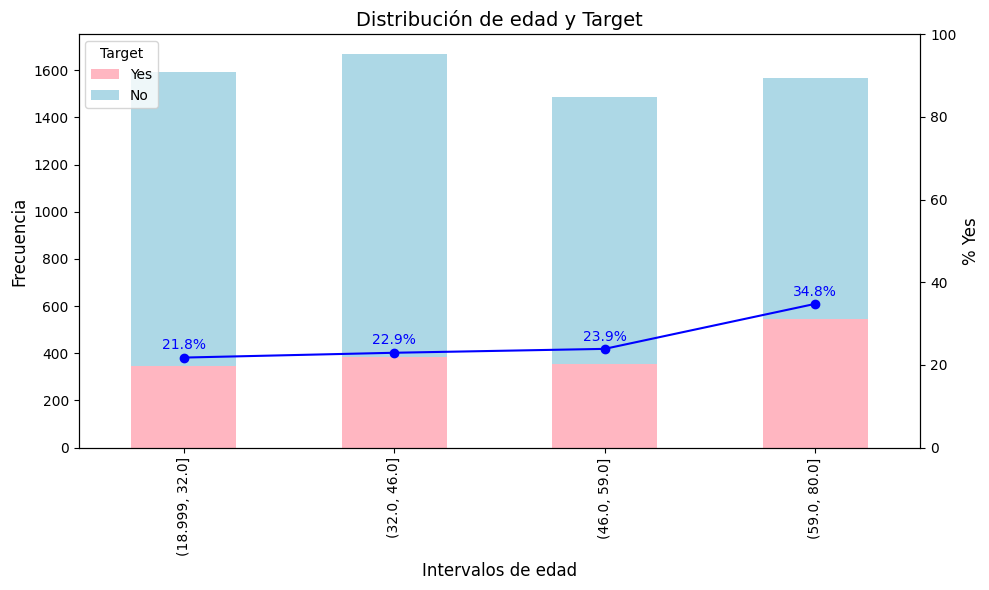

In [ ]:
# Agrupar los datos por categoría e intervalo
grouped_data = data.groupby(['Intervalos_edad', 'Churn Label']).size().unstack(fill_value=0)

# Calcular porcentajes de "bad"
grouped_data['Yes_percentage'] = grouped_data['Yes'] / grouped_data.sum(axis=1) * 100

# Colores pastel
colors = ['lightpink', 'lightblue']

# Crear gráfico de barras apiladas
fig, ax1 = plt.subplots(figsize=(10, 6))
grouped_data[['Yes', 'No']].plot(kind='bar', stacked=True, color=colors, ax=ax1)

# Configurar ejes del gráfico de barras
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.set_xlabel('Intervalos de edad', fontsize=12)
ax1.set_title('Distribución de edad y Target', fontsize=14)
ax1.legend(['Yes', 'No'], title='Target', loc='upper left')

# Crear un segundo eje Y para la línea de porcentaje
ax2 = ax1.twinx()
ax2.plot(grouped_data.index, grouped_data['Yes_percentage'], color='blue', marker='o', label='% Yes')
ax2.set_ylabel('% Yes', fontsize=12)
ax2.set_ylim(0, 100)

# Añadir etiquetas del porcentaje en la línea
for i, txt in enumerate(grouped_data['Yes_percentage']):
    ax2.text(i, txt + 2, f'{txt:.1f}%', ha='center', color='blue', fontsize=10)

# Ajustar visualización
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
data['TenureGroup'] = pd.cut(data['Tenure in Months'], bins=[0, 12, 24, 48, 60, 72], labels=['<1 año', '1-2 años', '2-4 años', '4-5 años', '>5 años'])


<ipython-input-48-dd6a7daf2e50>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['TenureGroup', 'Churn Label']).size().unstack(fill_value=0)


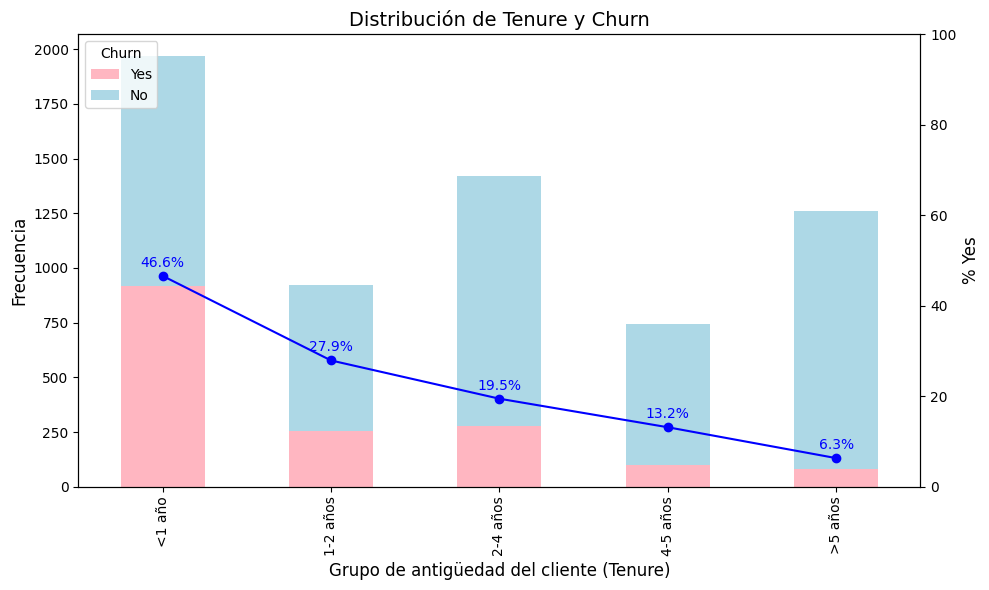

In [ ]:
import matplotlib.pyplot as plt

# Agrupar los datos por TenureGroup y Churn Label
grouped_data = data.groupby(['TenureGroup', 'Churn Label']).size().unstack(fill_value=0)

# Calcular porcentajes de churn ("Yes")
grouped_data['Yes_percentage'] = grouped_data['Yes'] / grouped_data.sum(axis=1) * 100

# Colores pastel
colors = ['lightpink', 'lightblue']

# Crear gráfico de barras apiladas
fig, ax1 = plt.subplots(figsize=(10, 6))
grouped_data[['Yes', 'No']].plot(kind='bar', stacked=True, color=colors, ax=ax1)

# Configurar ejes del gráfico de barras
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.set_xlabel('Grupo de antigüedad del cliente (Tenure)', fontsize=12)
ax1.set_title('Distribución de Tenure y Churn', fontsize=14)
ax1.legend(['Yes', 'No'], title='Churn', loc='upper left')

# Crear un segundo eje Y para la línea de porcentaje
ax2 = ax1.twinx()
ax2.plot(grouped_data.index, grouped_data['Yes_percentage'], color='blue', marker='o', label='% Yes')
ax2.set_ylabel('% Yes', fontsize=12)
ax2.set_ylim(0, 100)

# Añadir etiquetas del porcentaje en la línea
for i, txt in enumerate(grouped_data['Yes_percentage']):
    ax2.text(i, txt + 2, f'{txt:.1f}%', ha='center', color='blue', fontsize=10)

# Ajustar visualización
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


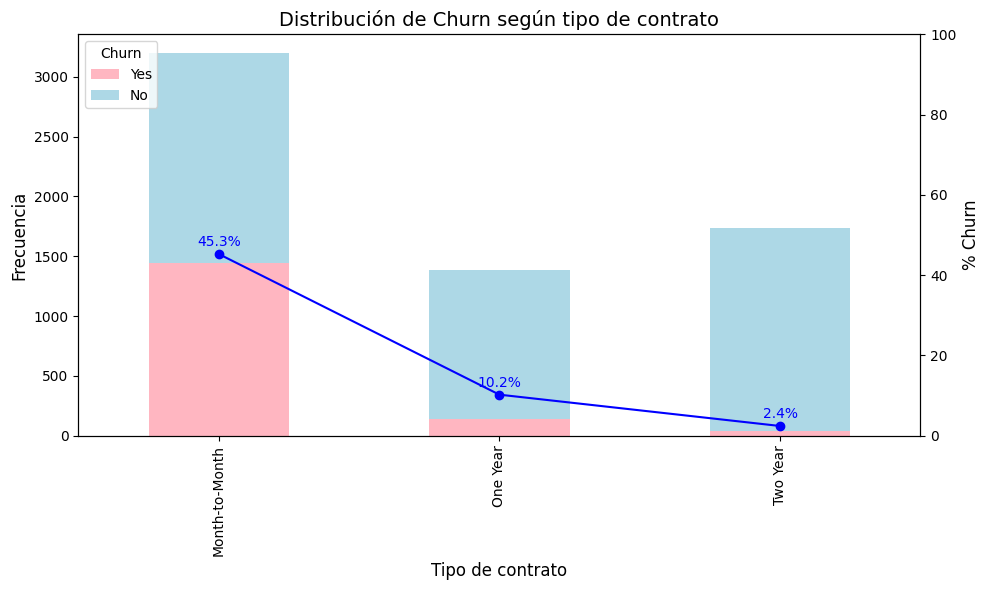

In [ ]:
import matplotlib.pyplot as plt

# Agrupar los datos por tipo de contrato y Churn Label
grouped_data = data.groupby(['Contract', 'Churn Label']).size().unstack(fill_value=0)

# Calcular porcentajes de churn ("Yes")
grouped_data['Yes_percentage'] = grouped_data['Yes'] / grouped_data.sum(axis=1) * 100

# Colores pastel
colors = ['lightpink', 'lightblue']

# Crear gráfico de barras apiladas
fig, ax1 = plt.subplots(figsize=(10, 6))
grouped_data[['Yes', 'No']].plot(kind='bar', stacked=True, color=colors, ax=ax1)

# Configurar ejes del gráfico de barras
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.set_xlabel('Tipo de contrato', fontsize=12)
ax1.set_title('Distribución de Churn según tipo de contrato', fontsize=14)
ax1.legend(['Yes', 'No'], title='Churn', loc='upper left')

# Crear un segundo eje Y para la línea de porcentaje
ax2 = ax1.twinx()
ax2.plot(grouped_data.index, grouped_data['Yes_percentage'], color='blue', marker='o', label='% Yes')
ax2.set_ylabel('% Churn', fontsize=12)
ax2.set_ylim(0, 100)

# Añadir etiquetas del porcentaje en la línea
for i, txt in enumerate(grouped_data['Yes_percentage']):
    ax2.text(i, txt + 2, f'{txt:.1f}%', ha='center', color='blue', fontsize=10)

# Ajustar visualización
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
data['Tienecompromiso'] = data['Contract'].map({
    'Month-to-Month': 0,
    'One Year': 1,
    'Two Year': 1
})


In [ ]:
# Convertir las columnas a 1 (Yes) y 0 (No)
streaming_cols = ['Streaming TV', 'Streaming Movies', 'Streaming Music']

for col in streaming_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

# Crear la columna Combo_stream: 1 si todas son 1, caso contrario 0
data['Combo_stream'] = (
    (data['Streaming TV'] == 1) &
    (data['Streaming Movies'] == 1) &
    (data['Streaming Music'] == 1)
).astype(int)


In [ ]:
columns_to_binary = [
    'Married', 'Dependents', 'Referred a Friend', 'Phone Service', 'Multiple Lines',
    'Online Security', 'Online Backup', 'Device Protection Plan',
    'Premium Tech Support', 'Unlimited Data',"Paperless Billing", "Churn Label","Internet Service"]

for col in columns_to_binary:
    data[col] = data[col].map({'Yes': 1, 'No': 0})


In [ ]:
data['Gender'] = data['Gender'].map({'Female': 1, 'Male': 0})


In [ ]:
data["Intervalos_edad"] = data["Intervalos_edad"].astype(str)
data["TenureGroup"] = data["TenureGroup"].astype(str)
data["Intervalos_edad"] = data["Intervalos_edad"].astype(str)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6315 entries, 1 to 7042
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             6315 non-null   int64  
 1   Age                                6315 non-null   int64  
 2   Married                            6315 non-null   int64  
 3   Dependents                         6315 non-null   int64  
 4   Number of Dependents               6315 non-null   int64  
 5   Population                         6315 non-null   int64  
 6   Referred a Friend                  6315 non-null   int64  
 7   Number of Referrals                6315 non-null   int64  
 8   Tenure in Months                   6315 non-null   int64  
 9   Offer                              6315 non-null   object 
 10  Phone Service                      6315 non-null   int64  
 11  Avg Monthly Long Distance Charges  6315 non-null   float64
 1

## Re-sampling (if needed)

In [ ]:
# Your code here

# 5.1. Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
#Procedemos a dividir la data, en este caso vamos a partir 70% para el train_data, 20% para la val_data y 10% para la test data
train_data, temp_data = train_test_split(data, train_size=0.70, random_state=9, stratify=data[["Churn Label"]])


In [ ]:
len(data)

6315

In [ ]:
len(train_data)

4420

In [ ]:
len(data), len(train_data)

(6315, 4420)

In [ ]:
# Busco el porcentaje para colocar
#en este caso seria 0.2/0.3=0.66666

In [ ]:
val_data, test_data= train_test_split(temp_data, train_size=0.66666, random_state=9, stratify=temp_data[["Churn Label"]])

In [ ]:
len(data), len(train_data), len(test_data), len(val_data)

(6315, 4420, 632, 1263)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6315 entries, 1 to 7042
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             6315 non-null   int64  
 1   Age                                6315 non-null   int64  
 2   Married                            6315 non-null   int64  
 3   Dependents                         6315 non-null   int64  
 4   Number of Dependents               6315 non-null   int64  
 5   Population                         6315 non-null   int64  
 6   Referred a Friend                  6315 non-null   int64  
 7   Number of Referrals                6315 non-null   int64  
 8   Tenure in Months                   6315 non-null   int64  
 9   Offer                              6315 non-null   object 
 10  Phone Service                      6315 non-null   int64  
 11  Avg Monthly Long Distance Charges  6315 non-null   float64
 1

## Encoding

In [ ]:
data

,Gender,Age,Married,Dependents,Number of Dependents,Population,Referred a Friend,Number of Referrals,Tenure in Months,Offer,...,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Label,Dependientes,Intervalos_edad,TenureGroup,Tienecompromiso,Combo_stream
1,1,74,1,1,1,55668,1,1,8,Offer E,...,0.00,0,390.80,1024.10,1,Grupo 1 0 2 dependientes,"(59.0, 80.0]",<1 año,0,0
2,0,71,0,1,3,47534,0,0,18,Offer D,...,45.61,0,203.94,1910.88,1,Grupo 3 o 4 dependientes,"(59.0, 80.0]",1-2 años,0,1
3,1,78,1,1,1,27778,1,1,25,Offer C,...,13.43,0,494.00,2995.07,1,Grupo 1 0 2 dependientes,"(59.0, 80.0]",2-4 años,0,0
4,1,80,1,1,1,26265,1,1,37,Offer C,...,0.00,0,234.21,3102.36,1,Grupo 1 0 2 dependientes,"(59.0, 80.0]",2-4 años,0,0
6,1,76,1,1,2,21343,1,1,1,Offer E,...,0.00,0,15.28,85.73,1,Grupo 1 0 2 dependientes,"(59.0, 80.0]",<1 año,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,30,0,0,0,2182,0,0,72,No Offer,...,19.31,0,1639.44,3039.53,0,Grupo sin dependientes,"(18.999, 32.0]",>5 años,1,0
7039,0,38,1,1,2,18980,1,1,24,Offer C,...,48.23,0,865.20,2807.47,0,Grupo 1 0 2 dependientes,"(32.0, 46.0]",1-2 años,1,1
7040,1,30,1,1,2,42,1,4,72,No Offer,...,45.38,0,2135.52,9453.04,0,Grupo 1 0 2 dependientes,"(18.999, 32.0]",>5 años,1,1
7041,1,32,1,1,2,301,1,1,11,No Offer,...,27.24,0,0.00,319.21,0,Grupo 1 0 2 dependientes,"(18.999, 32.0]",<1 año,0,0


In [ ]:
categorical_columns = train_data.select_dtypes(exclude=["number"]).columns

In [ ]:
categorical_columns

Index(['Offer', 'Internet Type', 'Contract', 'Payment Method', 'Dependientes',
       'Intervalos_edad', 'TenureGroup'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1

In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
!pip install cartopy
import cartopy

In [ ]:
!pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.3 MB/s eta 0:00:00


In [ ]:
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.one_hot import OneHotEncoder
from category_encoders.target_encoder import TargetEncoder

In [ ]:
from category_encoders import TargetEncoder, OrdinalEncoder, OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Columnas a transformar
targetEncoderColumns = ["Offer", "Contract"]
ordinalEncoderColumns = ["Intervalos_edad", "Dependientes", "TenureGroup"]
oneHotEncoderColumns = ["Payment Method", "Internet Type"]

# 1. Variable objetivo (importante hacer esto ANTES de transformar)
y_train = train_data["Churn Label"]
y_val = val_data["Churn Label"]
y_test = test_data["Churn Label"]

# 2. OrdinalEncoder
ordinal_encoder = OrdinalEncoder(
    cols=ordinalEncoderColumns,
    mapping=[
        {
            "col": "Intervalos_edad",
            "mapping": {
                "(18.999, 32.0]": 0,
                "(32.0, 46.0]": 1,
                "(46.0, 59.0]": 2,
                "(59.0, 80.0]": 3
            }
        },
        {
            "col": "Dependientes",
            "mapping": {
                "Grupo sin dependientes": 0,
                "Grupo 1 0 2 dependientes": 1,
                "Grupo 3 o 4 dependientes": 2,
                "Más de 4 dependientes": 3
            }
        },
        {
            "col": "TenureGroup",
            "mapping": {
                "<1 año": 0,
                "1-2 años": 1,
                "2-4 años": 2,
                "4-5 años": 3,
                ">5 años": 4
            }
        }
    ]
)

train_data = ordinal_encoder.fit_transform(train_data)
val_data = ordinal_encoder.transform(val_data)
test_data = ordinal_encoder.transform(test_data)

# 3. TargetEncoder
target_encoder = TargetEncoder(cols=targetEncoderColumns)
train_data[targetEncoderColumns] = target_encoder.fit_transform(train_data[targetEncoderColumns], y_train)
val_data[targetEncoderColumns] = target_encoder.transform(val_data[targetEncoderColumns])
test_data[targetEncoderColumns] = target_encoder.transform(test_data[targetEncoderColumns])

# 4. OneHotEncoder
# Entrenamos el one hot encoder solo con train_data
onehot_encoder = OneHotEncoder(cols=oneHotEncoderColumns, use_cat_names=True)

train_data = onehot_encoder.fit_transform(train_data)
val_data = onehot_encoder.transform(val_data)
test_data = onehot_encoder.transform(test_data)


## Train Data

In [ ]:
train_data

,Gender,Age,Married,Dependents,Number of Dependents,Population,Referred a Friend,Number of Referrals,Tenure in Months,Offer,...,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Label,Dependientes,Intervalos_edad,TenureGroup,Tienecompromiso,Combo_stream
3409,1,62,0,0,0,850,0,0,27,0.260314,...,0.00,0,965.79,1503.99,0,0,3,2,1,0
1097,0,76,1,0,0,268,1,2,63,0.110687,...,0.00,0,0.00,2298.90,0,0,3,4,1,0
224,0,79,0,0,0,30933,0,0,5,0.260314,...,0.00,0,22.95,472.70,1,0,3,0,0,0
3789,1,56,1,1,6,44652,1,6,49,0.110687,...,0.00,0,400.82,5014.77,0,3,2,3,0,1
6716,1,33,0,0,0,911,0,0,25,0.260314,...,29.29,0,30.50,1680.86,0,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,0,32,0,0,0,91,0,0,66,0.066066,...,0.00,0,762.96,4228.66,0,0,0,4,1,0
5835,0,42,1,1,3,23742,0,0,71,0.066066,...,0.00,0,2629.13,7321.68,0,2,1,4,1,0
537,0,80,1,0,0,25206,1,9,50,0.260314,...,0.00,0,724.50,5990.00,0,0,3,3,1,0
6769,0,19,0,0,0,30596,0,0,26,0.230189,...,0.00,0,1296.62,3505.37,0,0,0,2,0,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4420 entries, 3409 to 4184
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             4420 non-null   int64  
 1   Age                                4420 non-null   int64  
 2   Married                            4420 non-null   int64  
 3   Dependents                         4420 non-null   int64  
 4   Number of Dependents               4420 non-null   int64  
 5   Population                         4420 non-null   int64  
 6   Referred a Friend                  4420 non-null   int64  
 7   Number of Referrals                4420 non-null   int64  
 8   Tenure in Months                   4420 non-null   int64  
 9   Offer                              4420 non-null   float64
 10  Phone Service                      4420 non-null   int64  
 11  Avg Monthly Long Distance Charges  4420 non-null   float64

In [ ]:
train_data.columns

Index(['Gender', 'Age', 'Married', 'Dependents', 'Number of Dependents',
       'Population', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type_No Internet', 'Internet Type_DSL',
       'Internet Type_Fiber Optic', 'Internet Type_Cable',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method_Bank Withdrawal',
       'Payment Method_Credit Card', 'Payment Method_Mailed Check',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Churn Label', 'Dependientes', 'Intervalos_edad',
       'TenureGroup', 'Tienecompromiso', 'Combo_stream'],
     

**Como las clases están desbalanceadas uso SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
smote_sampler = SMOTE(sampling_strategy=0.75)

In [ ]:
X = train_data[[
    'Gender', 'Age', 'Married','Number of Dependents',
    'Population', 'Referred a Friend', 'Number of Referrals',
    'Tenure in Months', 'Offer', 'Phone Service',
    'Avg Monthly Long Distance Charges', 'Multiple Lines',
    'Internet Service', 'Internet Type_No Internet', 'Internet Type_DSL',
    'Internet Type_Fiber Optic', 'Internet Type_Cable',
    'Avg Monthly GB Download', 'Online Security', 'Online Backup',
    'Device Protection Plan', 'Premium Tech Support', 'Unlimited Data',
    'Paperless Billing', 'Payment Method_Bank Withdrawal',
    'Payment Method_Credit Card', 'Payment Method_Mailed Check',
    'Monthly Charge', 'Total Charges', 'Total Refunds',
    'Total Extra Data Charges', 'Total Long Distance Charges',
    'Total Revenue', 'Dependientes', 'Intervalos_edad',
    'Tienecompromiso', 'Combo_stream'
]]
y = train_data["Churn Label"]

smote_resampled_data = smote_sampler.fit_resample(X=X, y=y)


In [ ]:
len(smote_resampled_data), type(smote_resampled_data)

(2, tuple)

In [ ]:
smote_resampled_features = smote_resampled_data[0]
smote_resampled_target = smote_resampled_data[1]

In [ ]:
smote_resampled_target.value_counts()

,count
Churn Label,
0,3279
1,2459


## Baseline model

## *XGBOOST*

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [ ]:
# features = ['Gender', 'Age', 'Married','Number of Dependents',
#     'Population', 'Referred a Friend', 'Number of Referrals',
#     'Tenure in Months', 'Offer', 'Phone Service',
#     'Avg Monthly Long Distance Charges', 'Multiple Lines',
#     'Internet Service', 'Internet Type_No Internet', 'Internet Type_DSL',
#     'Internet Type_Fiber Optic', 'Internet Type_Cable',
#     'Avg Monthly GB Download', 'Online Security', 'Online Backup',
#     'Device Protection Plan', 'Premium Tech Support', 'Unlimited Data',
#     'Paperless Billing', 'Payment Method_Bank Withdrawal',
#     'Payment Method_Credit Card', 'Payment Method_Mailed Check',
#     'Monthly Charge', 'Total Charges', 'Total Refunds',
#     'Total Extra Data Charges', 'Total Long Distance Charges',
#     'Total Revenue', 'Dependientes', 'Intervalos_edad',
#     'Tienecompromiso', 'Combo_stream'
# ]




In [ ]:
# === MODELO CON SMOTE ===

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Features usados en SMOTE y que se mantendrán en el modelo


features = ['Gender', 'Age', 'Married','Number of Dependents',
    'Population', 'Referred a Friend', 'Number of Referrals',
    'Tenure in Months', 'Offer', 'Phone Service',
    'Avg Monthly Long Distance Charges', 'Multiple Lines',
    'Internet Service', 'Internet Type_No Internet', 'Internet Type_DSL',
    'Internet Type_Fiber Optic', 'Internet Type_Cable',
    'Avg Monthly GB Download', 'Online Security', 'Online Backup',
    'Device Protection Plan', 'Premium Tech Support', 'Unlimited Data',
    'Paperless Billing', 'Payment Method_Bank Withdrawal',
    'Payment Method_Credit Card', 'Payment Method_Mailed Check',
    'Monthly Charge', 'Total Charges', 'Total Refunds',
    'Total Extra Data Charges', 'Total Long Distance Charges',
    'Total Revenue', 'Dependientes',
    'Tienecompromiso', 'Combo_stream'
]




In [ ]:
# Crear el modelo (ya no es necesario scale_pos_weight porque SMOTE equilibró las clases)
model = xgb.XGBClassifier(
    objective="binary:logistic",
    n_estimators=100,
    max_depth=20,
    max_leaves=10,
    subsample=0.6,
    colsample_bytree=0.4,
    colsample_bynode=0.9,
    scale_pos_weight=0.8,
    random_state=1,
    use_label_encoder=False,
    eval_metric="logloss"
)

# Entrenar el modelo con los datos sobremuestreados
model.fit(smote_resampled_features[features], smote_resampled_target)



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:50:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=0.9,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
              max_leaves=10, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Predicciones
pred_train = model.predict(smote_resampled_features[features])
pred_val = model.predict(val_data[features])

# Evaluación para entrenamiento
print("=== ENTRENAMIENTO ===")
print(classification_report(smote_resampled_target, pred_train))
print(confusion_matrix(smote_resampled_target, pred_train))

# Evaluación para validación
print("=== VALIDACIÓN ===")
print(classification_report(y_val, pred_val))
print(confusion_matrix(y_val, pred_val))


=== ENTRENAMIENTO ===
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3279
           1       0.93      0.90      0.92      2459

    accuracy                           0.93      5738
   macro avg       0.93      0.93      0.93      5738
weighted avg       0.93      0.93      0.93      5738

[[3125  154]
 [ 246 2213]]
=== VALIDACIÓN ===
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       937
           1       0.71      0.65      0.68       326

    accuracy                           0.84      1263
   macro avg       0.79      0.78      0.78      1263
weighted avg       0.84      0.84      0.84      1263

[[849  88]
 [115 211]]


# 5. Train model/Tune hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb

# Definir el modelo base
model = xgb.XGBClassifier(
    objective="binary:logistic",
    use_label_encoder=False,
    scale_pos_weight=0.8,
    eval_metric="logloss",
    random_state=1
)

# Definir el espacio de búsqueda para los hiperparámetros
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [6, 10, 20],
    'max_leaves': [5, 10, 20],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.4, 0.6],
    'colsample_bynode': [0.6, 0.9]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Ejecutar la búsqueda
grid_search.fit(smote_resampled_features[features], smote_resampled_target)

# Mejor modelo
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:")
print(grid_search.best_params_)

# Predicciones con el mejor modelo
pred_train = best_model.predict(smote_resampled_features[features])
pred_val = best_model.predict(val_data[features])

# Evaluación para entrenamiento
print("\n=== ENTRENAMIENTO (TUNEADO) ===")
print(classification_report(smote_resampled_target, pred_train))
print(confusion_matrix(smote_resampled_target, pred_train))

# Evaluación para validación
print("\n=== VALIDACIÓN (TUNEADO) ===")
print(classification_report(y_val, pred_val))
print(confusion_matrix(y_val, pred_val))


Fitting 3 folds for each of 144 candidates, totalling 432 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:51:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores hiperparámetros:
{'colsample_bynode': 0.9, 'colsample_bytree': 0.6, 'max_depth': 6, 'max_leaves': 10, 'n_estimators': 50, 'subsample': 0.8}

=== ENTRENAMIENTO (TUNEADO) ===
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3279
           1       0.91      0.87      0.89      2459

    accuracy                           0.91      5738
   macro avg       0.91      0.90      0.91      5738
weighted avg       0.91      0.91      0.91      5738

[[3062  217]
 [ 312 2147]]

=== VALIDACIÓN (TUNEADO) ===
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       937
           1       0.73      0.66      0.69       326

    accuracy                           0.85      1263
   macro avg       0.81      0.79      0.80      1263
weighted avg       0.85      0.85      0.85      1263

[[857  80]
 [110 216]]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from scipy.stats import uniform

# Definir el modelo base
model = xgb.XGBClassifier(
    objective="binary:logistic",
    scale_pos_weight=0.8,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=1
)

# Definir el espacio de búsqueda para los hiperparámetros (usando distribuciones aleatorias)
param_dist = {
    'n_estimators': [50, 100, 150, 200],  # número de estimadores
    'max_depth': [6, 10, 15, 20],           # profundidad máxima de los árboles
    'max_leaves': [5, 10, 15, 20, 25],      # número máximo de hojas en los árboles
    'subsample': uniform(0.6, 0.4),         # proporción de muestras para cada árbol
    'colsample_bytree': uniform(0.4, 0.6),  # proporción de características para cada árbol
    'colsample_bynode': uniform(0.6, 0.3),  # proporción de características por nodo
    'learning_rate': uniform(0.01, 0.2),    # tasa de aprendizaje
    'gamma': uniform(0, 0.3),               # regularización en los árboles
    'min_child_weight': [1, 3, 5, 10]       # peso mínimo de los nodos hijos
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,  # número de combinaciones aleatorias a probar
    scoring='roc_auc',  # puedes probar 'roc_auc' si prefieres
    cv=5,  # 5 pliegues para validación cruzada
    verbose=1,
    n_jobs=-1,
    random_state=1
)

# Ejecutar la búsqueda
random_search.fit(smote_resampled_features[features], smote_resampled_target)

# Mejor modelo
best_model = random_search.best_estimator_
print("Mejores hiperparámetros:")
print(random_search.best_params_)

# Predicciones con el mejor modelo
pred_train = best_model.predict(smote_resampled_features[features])
pred_val = best_model.predict(val_data[features])

# Evaluación para entrenamiento
print("\n=== ENTRENAMIENTO (TUNEADO) ===")
print(classification_report(smote_resampled_target, pred_train))
print(confusion_matrix(smote_resampled_target, pred_train))

# Evaluación para validación
print("\n=== VALIDACIÓN (TUNEADO) ===")
print(classification_report(y_val, pred_val))
print(confusion_matrix(y_val, pred_val))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:52:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores hiperparámetros:
{'colsample_bynode': np.float64(0.8070613763265435), 'colsample_bytree': np.float64(0.7886496398640086), 'gamma': np.float64(0.10618172663949058), 'learning_rate': np.float64(0.1626466105430244), 'max_depth': 6, 'max_leaves': 25, 'min_child_weight': 3, 'n_estimators': 150, 'subsample': np.float64(0.9525367318536044)}

=== ENTRENAMIENTO (TUNEADO) ===
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3279
           1       0.98      0.96      0.97      2459

    accuracy                           0.97      5738
   macro avg       0.97      0.97      0.97      5738
weighted avg       0.97      0.97      0.97      5738

[[3224   55]
 [ 107 2352]]

=== VALIDACIÓN (TUNEADO) ===
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       937
           1       0.71      0.66      0.68       326

    accuracy                           0.84      1263
   macro avg       0.

# 6. Model performance evaluation

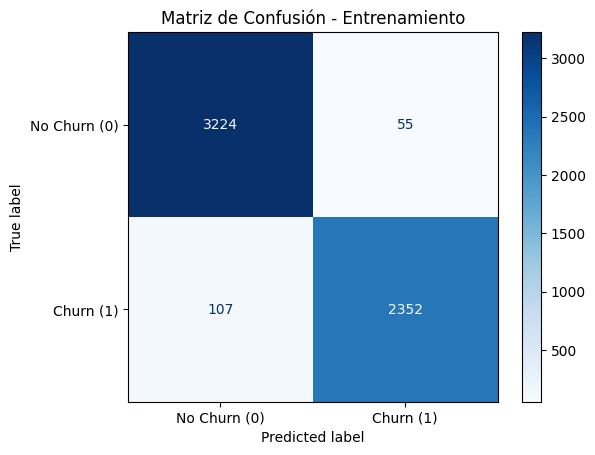

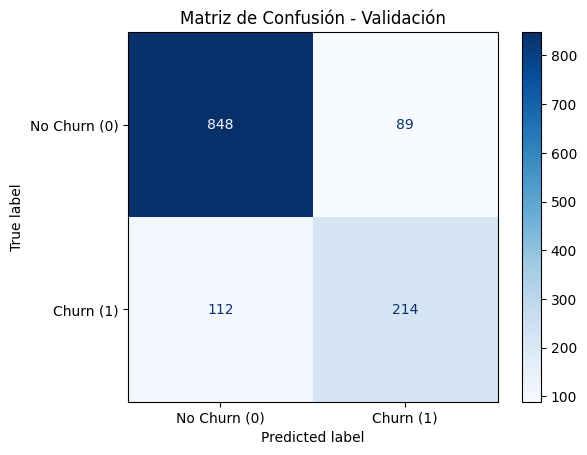

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === Matriz de confusión para ENTRENAMIENTO ===
ConfusionMatrixDisplay.from_predictions(
    y_true=smote_resampled_target,  # Asegúrate de usar los valores verdaderos del entrenamiento
    y_pred=pred_train,
    display_labels=["No Churn (0)", "Churn (1)"],  # Aquí especificamos que 1 es "Churn"
    cmap=plt.cm.Blues
)
plt.title("Matriz de Confusión - Entrenamiento")
plt.show()

# === Matriz de confusión para VALIDACIÓN ===
ConfusionMatrixDisplay.from_predictions(
    y_true=y_val,  # Asegúrate de usar los valores verdaderos de la validación
    y_pred=pred_val,
    display_labels=["No Churn (0)", "Churn (1)"],  # Aquí también especificamos que 1 es "Churn"
    cmap=plt.cm.Blues
)
plt.title("Matriz de Confusión - Validación")
plt.show()


# 7. Explainability

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [ ]:
explainer = shap.TreeExplainer(best_model)


In [ ]:
explanation = explainer(train_data[features])

In [ ]:
explanation.values.shape

(4420, 36)

In [ ]:
explanation.values[:, 1]


array([-0.01333435,  0.6145553 ,  0.9009584 , ...,  0.29585373,
       -1.3363436 , -0.9067807 ], dtype=float32)

In [ ]:
train_data[features].shape

(4420, 36)

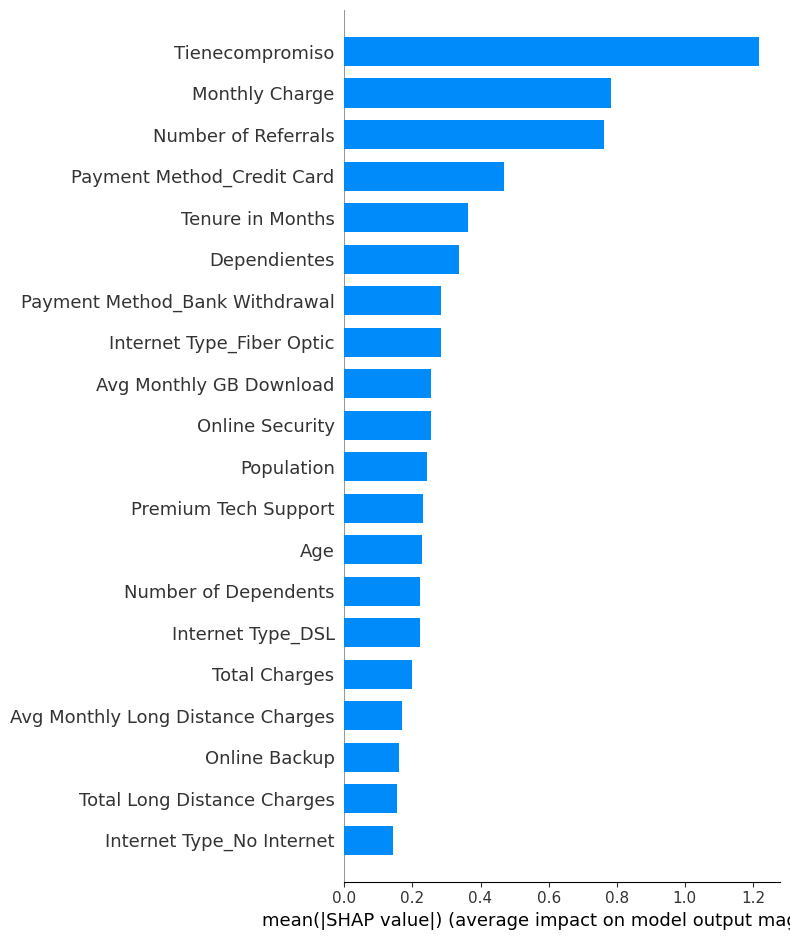

In [ ]:
import matplotlib.pyplot as plt
import shap

plt.figure(figsize=(20, 8))
shap.summary_plot(explanation.values, features=train_data[features], plot_type="bar")


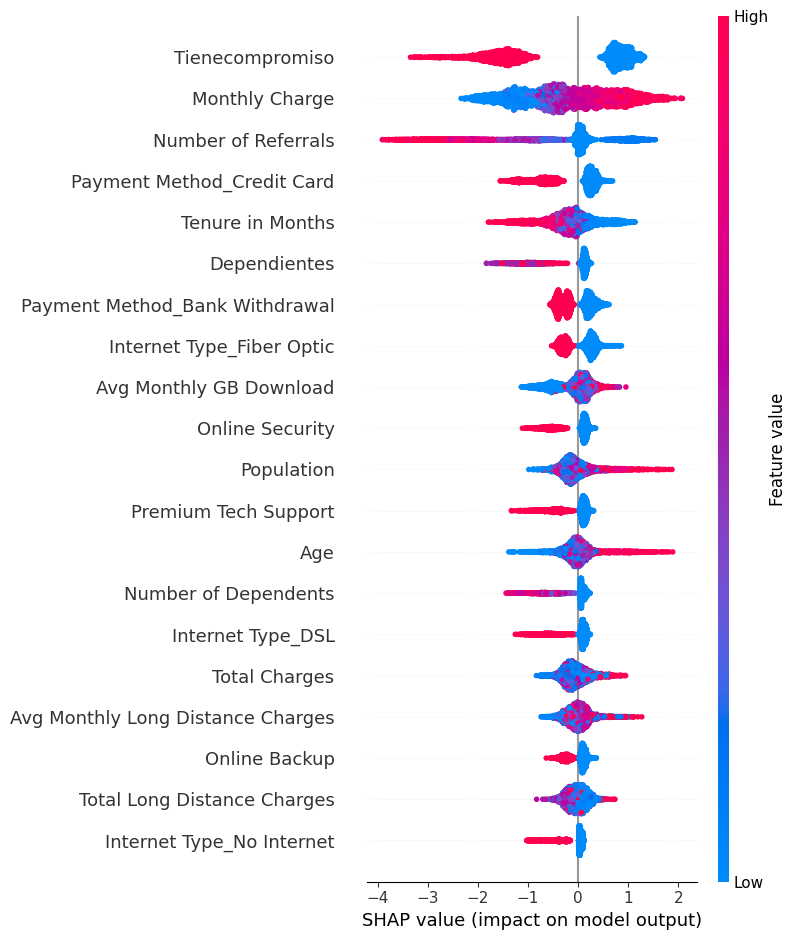

In [ ]:
plt.figure(figsize=(20,8))
shap.summary_plot(explanation.values, features=train_data[features])


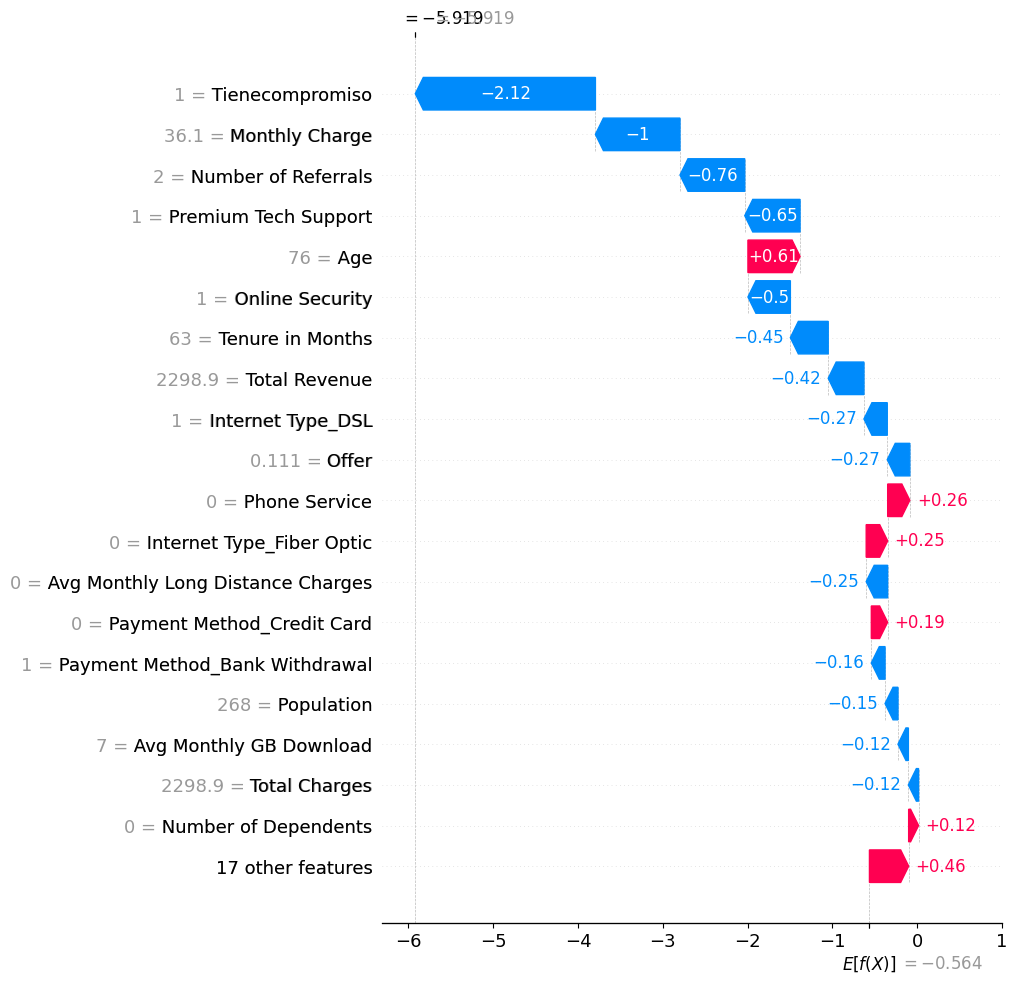

In [ ]:
shap.plots.waterfall(explanation[1], max_display=20)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones con el mejor modelo
pred_train = best_model.predict(smote_resampled_features[features])
pred_val = best_model.predict(val_data[features])
pred_test = best_model.predict(test_data[features])  # Predicciones para test_data

# Evaluación para entrenamiento
print("\n=== ENTRENAMIENTO (TUNEADO) ===")
print(classification_report(smote_resampled_target, pred_train))
print(confusion_matrix(smote_resampled_target, pred_train))

# Evaluación para validación
print("\n=== VALIDACIÓN (TUNEADO) ===")
print(classification_report(y_val, pred_val))
print(confusion_matrix(y_val, pred_val))

# Evaluación para test
print("\n=== PRUEBA (TUNEADO) ===")  # Evaluación en test_data
print(classification_report(test_data["Churn Label"], pred_test))
print(confusion_matrix(test_data["Churn Label"], pred_test))  # Cambia 'target' por el nombre de la columna de tu variable dependiente en test_data



=== ENTRENAMIENTO (TUNEADO) ===
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3279
           1       0.98      0.96      0.97      2459

    accuracy                           0.97      5738
   macro avg       0.97      0.97      0.97      5738
weighted avg       0.97      0.97      0.97      5738

[[3224   55]
 [ 107 2352]]

=== VALIDACIÓN (TUNEADO) ===
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       937
           1       0.71      0.66      0.68       326

    accuracy                           0.84      1263
   macro avg       0.79      0.78      0.79      1263
weighted avg       0.84      0.84      0.84      1263

[[848  89]
 [112 214]]

=== PRUEBA (TUNEADO) ===
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       469
           1       0.73      0.67      0.70       163

    accuracy                           0.85

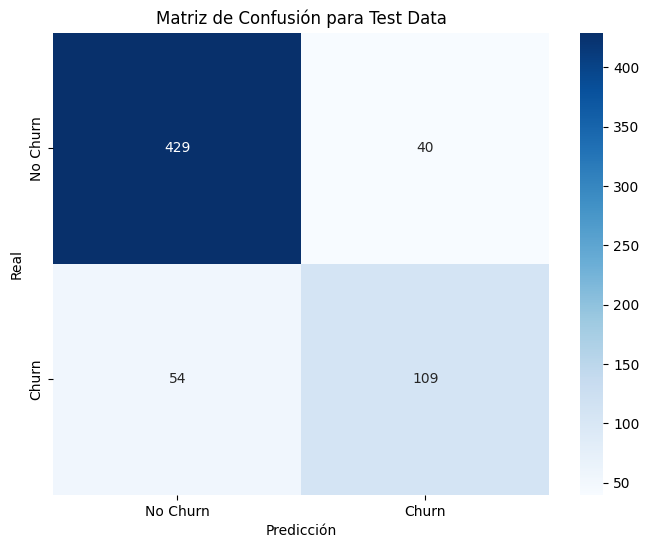

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(test_data['Churn Label'], pred_test)

# Crear la figura y el gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Matriz de Confusión para Test Data")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()
